<div style="text-align: center;">
  <h1>Updating Master Thesis' Analysis with Modern Statistical Libraries</h1>
  <h3>A Study Overview</h3>

  <hr>

  <p><b>Authors:</b> C. Fabris; P. C. Meletti<br>
  <b>Affiliation:</b> Universidade Estadual de Londrina - UEL / Laboratório de Ecofisiologia Animal<br>
  <b>Date:</b> 26 September 2025</p>

  <hr>
</div>

---

> This document provides an overview of the behavioral data collected in the original study by Fabris (2022), which investigated the sequential application of three behavioral tests in zebrafish (Danio rerio) exposed to ethanol. The original study applied a tiered-test battery consisting of a light-dark test, a novel tank test, and a swimming endurance test, aiming to assess stress- and anxiety-like behaviors while optimizing sampling effort and resources. Initial analyses were conducted using Excel, SigmaPlot, and Past statistical approaches. 
> In the present work, the dataset is being re-evaluated using modern, fully open-access, and reproducible tools in Python, leveraging statistical libraries to allow public inspection and verification via GitHub. This updated analysis seeks to improve transparency, incorporate univariate, multivariate, and Principal Component Analysis (PCA). The ultimate goal is to provide a robust, reproducible, and modernized interpretation of the dataset.

---

<div style="text-align: center;">
<image src="images/zebrafish.jpg" alt="Zebrafish" width="1600">
</div>

<div style="text-align: center;">
<h2>Introduction</h2>
</div>

<div style="text-align: justify;">

<p>Over the past two decades, the zebrafish (<i>Danio rerio</i>) has become a leading vertebrate model in neuroscience and pharmacology, offering a rich behavioral repertoire alongside practical advantages such as low maintenance cost, high reproductive output, and evolutionary conservation of key neurotransmitter systems (<a href="https://doi.org/10.1111/j.1469-185X.2007.00054.x" target="_blank">Spence et al., 2008</a>; <a href="https://doi.org/10.1007/s11065-014-9257-3" target="_blank">Kalueff et al., 2014</a>; <a href="https://doi.org/10.1146/annurev-neuro-072116-031646" target="_blank">Orger & de Polavieja, 2017</a>). These features have made zebrafish increasingly valuable for translational research on stress, anxiety, and neuropsychiatric disorders (<a href="https://doi.org/10.1016/j.bbr.2010.05.031" target="_blank">Stewart et al., 2012</a>; <a href="https://doi.org/10.1016/j.bbr.2009.10.008" target="_blank">Maximino et al., 2010</a>).</p>

<p>Despite this progress, zebrafish studies remain dominated by <b>single-test protocols</b> (e.g., light–dark test, novel tank test, shoaling), which inflate sample sizes, increase costs, and limit opportunities to integrate multidomain behavioral data. By contrast, rodent research has long benefited from <b>sequential behavioral batteries</b>, where the same individuals are tested across paradigms, maximizing data yield per subject and enabling multidimensional profiling (<a href="https://doi.org/10.1016/S0031-9384(01)00511-6" target="_blank">McIlwain et al., 2001</a>; <a href="https://doi.org/10.1016/j.bbr.2011.10.041" target="_blank">Blokland et al., 2012</a>). This methodological gap highlights the need for more efficient and integrative approaches in zebrafish research, consistent with the <b>3Rs principle</b> (Replacement, Reduction, Refinement) (<a href="https://doi.org/10.1007/s11948-006-0006-6" target="_blank">Kolar, 2006</a>).</p>

<p>The original master’s thesis by <b>Fabris (2022)</b> addressed this gap by applying a <b>sequential test battery</b> in zebrafish exposed to ethanol, a well-documented behavioural modulator (<a href="https://doi.org/10.1016/j.pbb.2006.07.013" target="_blank">Gerlai et al., 2006</a>; <a href="https://doi.org/10.1016/j.pbb.2019.172790" target="_blank">Bernardo et al., 2019</a>). The design combined, conceptually in this order:</p>

<ul>
<li><b>Light–Dark Test (LDT)</b> → anxiety-like and phototaxis (<a href="https://doi.org/10.1007/978-1-61779-521-3_12" target="_blank">Stewart et al., 2011</a>; <a href="https://doi.org/10.1163/156853912X640443" target="_blank">Maximino et al., 2012</a>)</li>
<li><b>Novel Tank Test (NTT)</b> → anxiety-like and locomotor exploration (<a href="https://doi.org/10.1007/978-1-61779-521-3_12" target="_blank">Stewart et al., 2011</a>; <a href="https://doi.org/10.1016/j.bbr.2017.06.003" target="_blank">Kysil et al., 2017</a>)</li>
<li><b>Endurance Assay</b> → physical performance as stress-related marker (<a href="https://doi.org/10.1016/S1546-5098(01)00005-7" target="_blank">Baemish et al., 1978</a>; <a href="https://doi.org/10.1016/S1095-6433(01)00042-6" target="_blank">Plaut, 2001</a>)</li>
</ul>

<p>This was the <b>first zebrafish sequential battery</b> spanning multiple domains, evaluated under pharmacological manipulation. Importantly, the study proposed <b>Principal Component Analysis (PCA)</b> as a framework to integrate behavioral endpoints and uncover latent dimensions beyond isolated ANOVAs.</p>

<hr>

<h3>🎯 Purpose of This Notebook</h3>

<p>The present notebook revisits the original dataset with <b>modern, open-source statistical tools in Python</b>. Analyses that were previously conducted in Excel, SigmaPlot, and Past are re-implemented here using reproducible workflows with libraries such as <code>pandas</code>, <code>scipy</code>, <code>statsmodels</code>, and <code>scikit-learn</code>.</p>

<p>By modernizing the statistical pipeline, this work aims to:</p>

<ul>
<li>✅ Ensure <b>transparency and reproducibility</b> (with all code openly available).</li>
<li>✅ Apply <b>univariate, multivariate, and PCA analyses</b> within a coherent framework.</li>
<li>✅ Demonstrate how sequential test batteries can be leveraged in zebrafish research to enhance efficiency and translational relevance.</li>
</ul>

<p>Ultimately, this updated analysis not only strengthens the original conclusions but also sets a precedent for <b>open, reproducible, and resource-efficient behavioral neuroscience</b>.</p>

</div>

---

The **main question** of the work is, therefore, **methodological in essence**:

>Can a sequential behavioral test battery in zebrafish reliably measure stress- and anxiety-like behaviors under pharmacological modulation, without losing sensitivity compared to single, isolated tests, while enabling multidomain analysis of behavior using modern statistical approaches like PCA?

---

## Libraries and Settings

In [1]:
# 🐍📦 Import libraries for analysis & visualization

# 📊 Data handling
import pandas as pd
import numpy as np

# 📈 Statistical analysis
from scipy import stats
from scipy.stats import shapiro, kruskal, fisher_exact, mannwhitneyu
import scikit_posthocs as sp
import itertools
from itertools import combinations

# 🎨 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Plot & style settings
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (8, 6)
pd.set_option('display.max_columns', None)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Overall Functions
def kruskal_summary(box, value_col, time_col='time', group_col='dose', alpha=0.05):
    times = sorted(box[time_col].unique())
    for t in times:
        subset = box[box[time_col] == t]
        groups = sorted(subset[group_col].unique())

        # Summary
        summary = subset.groupby(group_col)[value_col].agg(['mean','std','median','min','max','count'])
        print(f"\n=== Time: {t} Summary ===")
        print(summary)

        # Kruskal-Wallis
        data_groups = [subset[subset[group_col]==g][value_col].values for g in groups]
        H, p_kw = stats.kruskal(*data_groups)
        print(f"\n=== Time: {t} Kruskal-Wallis ===")
        print(f"Kruskal-Wallis H = {H:.3f}, p = {p_kw:.4f}")

        # Pairwise Mann-Whitney with Bonferroni if significant
        if p_kw < alpha:
            print("Significant differences found; running pairwise tests...")
            for g1, g2 in combinations(groups, 2):
                d1 = subset[subset[group_col]==g1][value_col].values
                d2 = subset[subset[group_col]==g2][value_col].values
                U, p = stats.mannwhitneyu(d1, d2, alternative='two-sided')
                # Bonferroni correction
                n_comparisons = len(groups)*(len(groups)-1)/2
                p_corrected = min(p * n_comparisons, 1.0)
                print(f"{t} {g1} vs {g2} p = {p_corrected:.4f}")
        else:
            print("No significant differences; skipping pairwise tests.")

# universal variables
groups = ['0.0%', '0.5%', '1.0%']
times = ['01h', '24h', '96h']

## Data Extraction

In [3]:
data_path = r"C:\Users\caiqu\OneDrive\Documents\Masters"

# 📂 Load datasets
df = pd.read_csv(f"{data_path}/battery_suite_1.csv") # Full battery (LDT - NTT - Endurance)

df = df.drop(columns=['Unnamed: 0']) # Drop unnecessary index column
df = df.set_index('fish_id') # Set fish_id as index

<div style="text-align: center;">
    <h3>About the Dataset</h3>
</div>

<div style="text-align: justify">
This dataset was generated by <b>Fabris (2022)</b> at the Laboratory of Animal Ecophysiology in the Universidade Estadual de Londrina (UEL), in experiments testing the effects of ethanol exposure on zebrafish (<i>Danio rerio</i>). Each entry corresponds to one fish, with identifiers linking group, ethanol treatment and exposure time. Variables include behavioral measures (<i>e.g.</i> latency, zone preference, locomotion, velocity, resistance indices), morphological traits (lengths, weight, condition factor, sex, blood sugar), and environmental parameters (water conductivity and pH). Together, these records provide a multidimensional view of how ethanol affects zebrafish behavior and physiology under controlled laboratory conditions.
</div>

## Checking Overall Numerical Data Normality

In [4]:
# Checking Normality for each numerical column
num_df = df.select_dtypes(include=[np.number])  # Select only numerical columns
num_cols = num_df.columns
normal_cols = []

for col in num_cols:
    stat, p = shapiro(df[col])
    if p > 0.05:
        normal_cols.append((col, stat, p, True))

# Display results
if normal_cols:
    print("Columns that are normally distributed:")
    for col, stat, p, in normal_cols:
        print(f"{col}: stat={stat:.3f}, p={p:.3f}")
else:
    print("No columns are normally distributed.")


No columns are normally distributed.


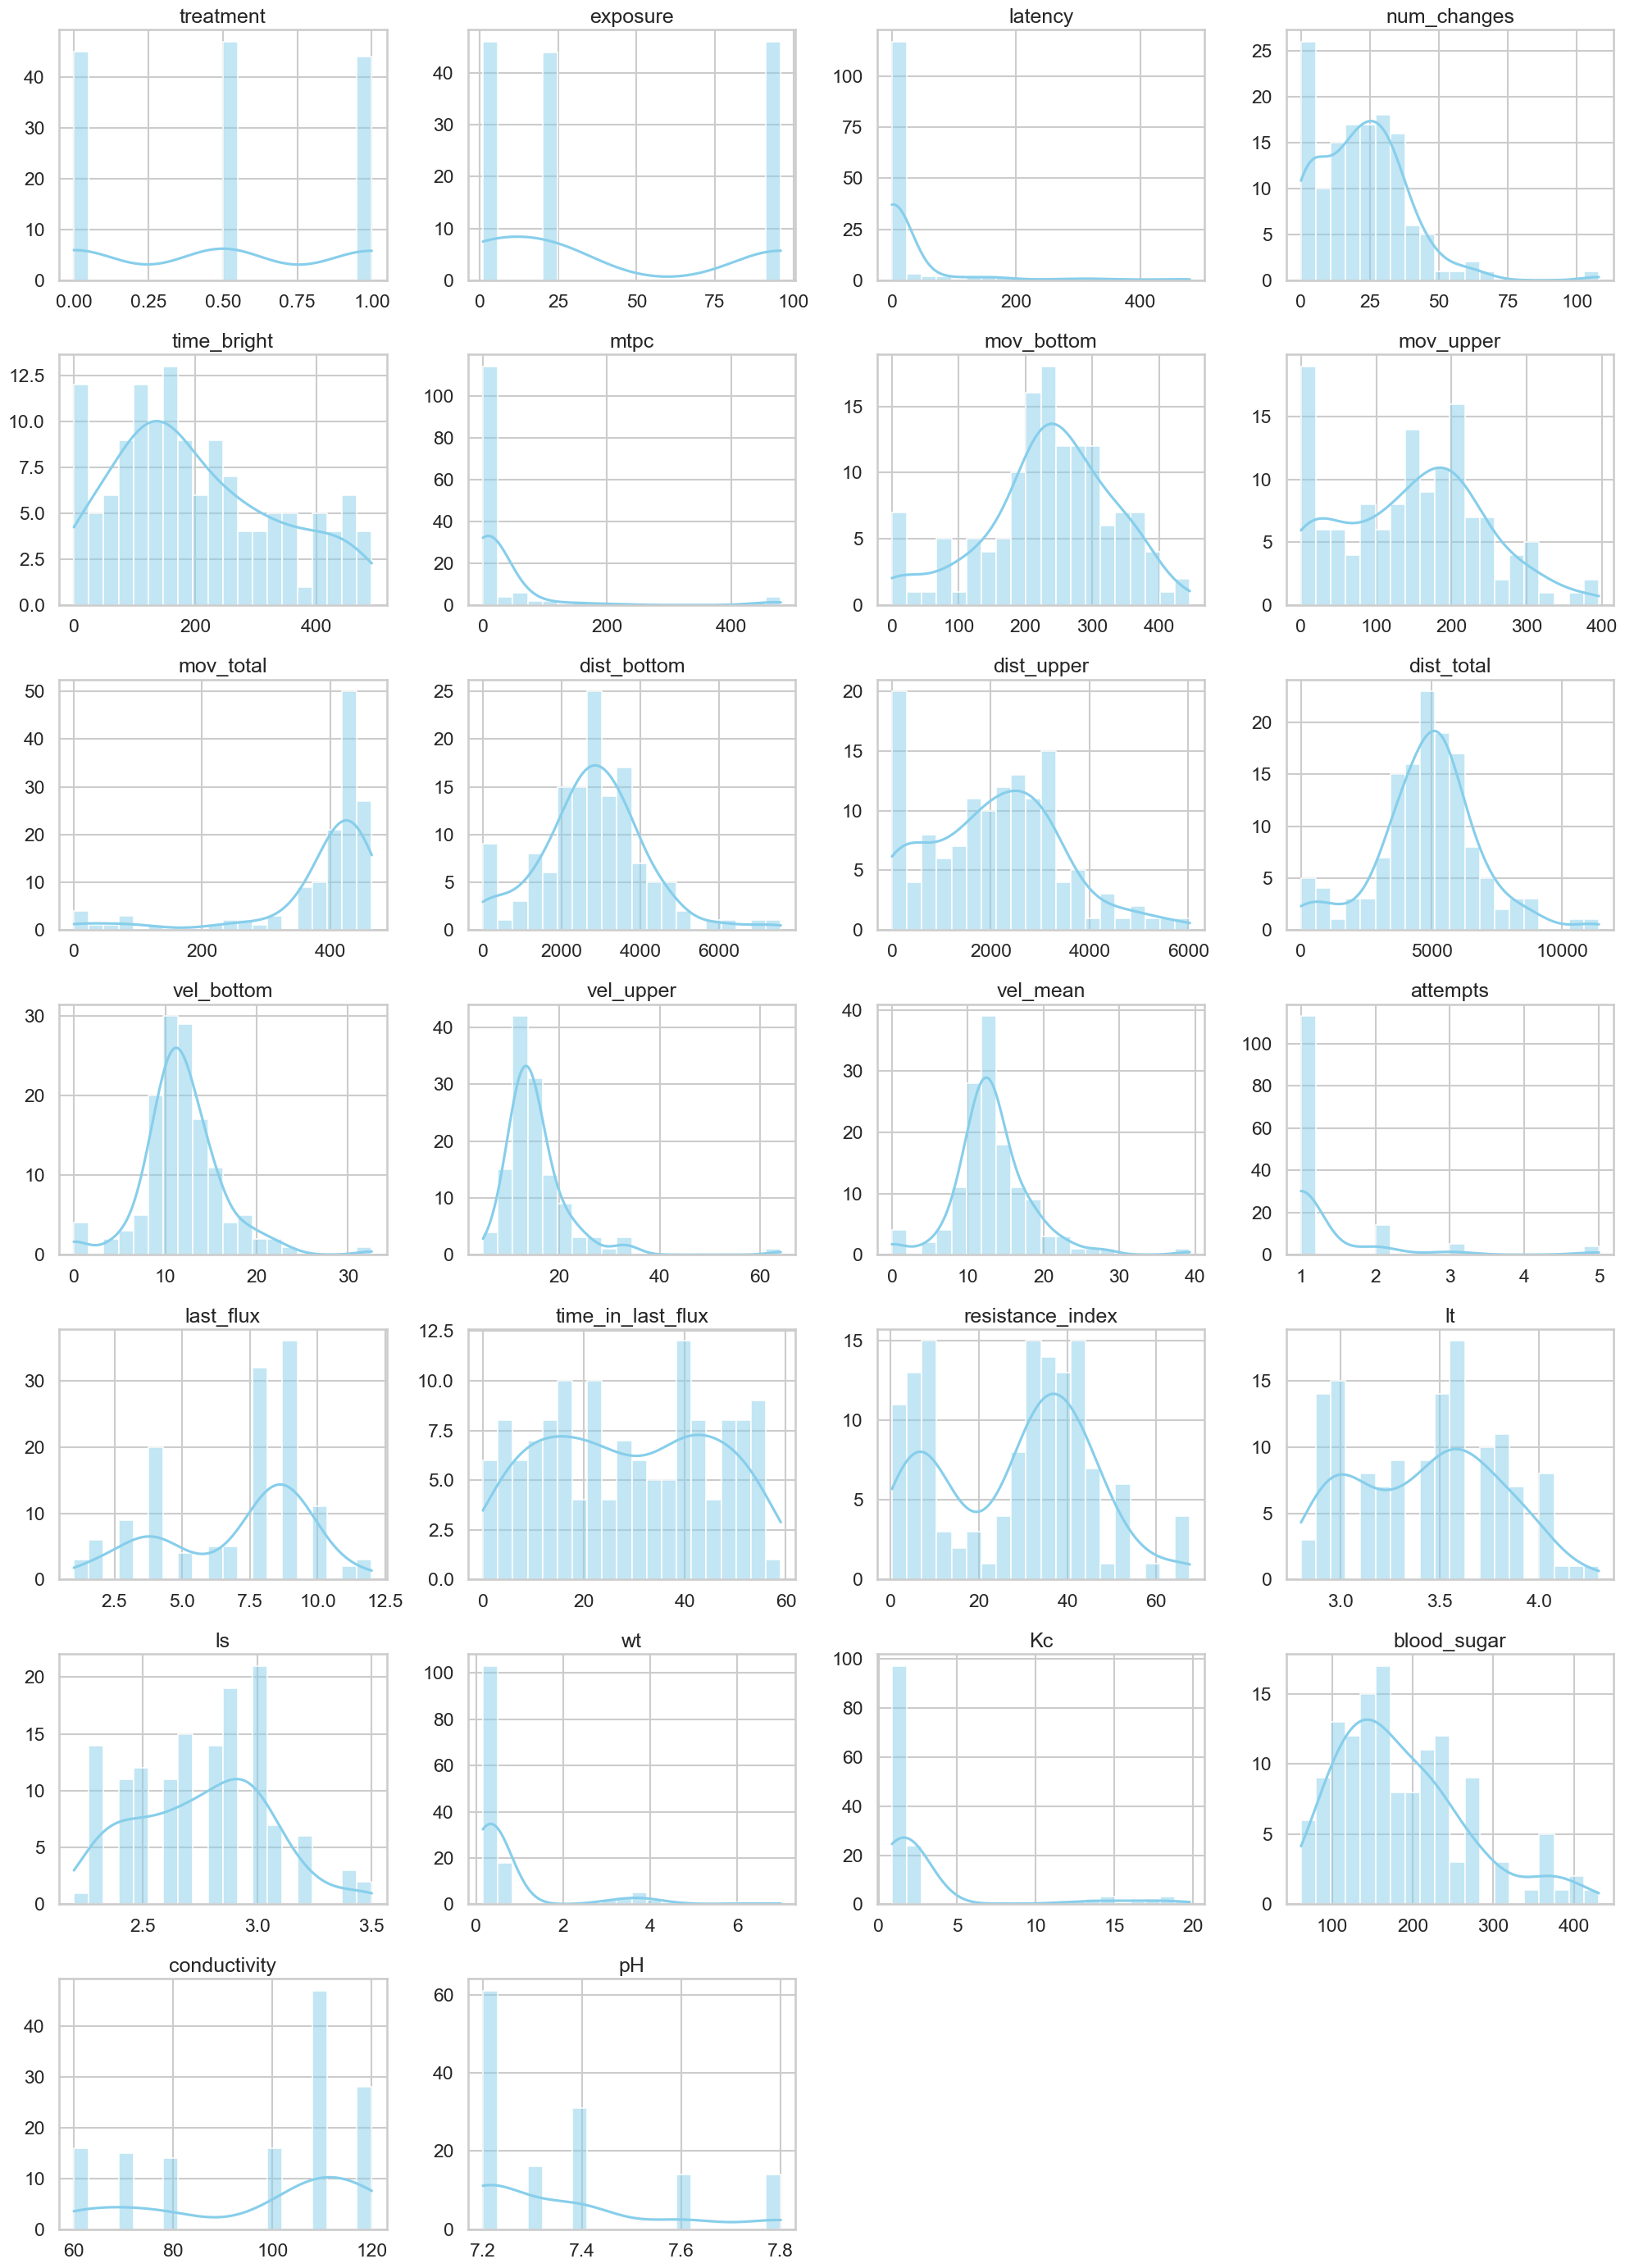

In [5]:
# Visualizing numerical data distribution
n_cols = 4 # Number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

All parameters are **non-normal**. Therefore, Parametric tests (t-tests, ANOVA) cannot be reliably used on this raw dataset.

## Checking Overall Data Correlation

<div style="text-align: justify;">
    <p>
    We are using Spearman correlation instead of Pearson because our data is not normally distributed, as previously indicated by the Shapiro–Wilk tests. Spearman’s method is a non-parametric rank-based correlation, which assesses monotonic relationships between variables without assuming linearity or normality. This makes it more robust for behavioral datasets like this one, where distributions can be skewed or contain outliers, ensuring that the correlations reflect genuine associations rather than artifacts of distribution shape.
    </p>
</div>

In [6]:
corr_matrix = num_df.corr(method='spearman')

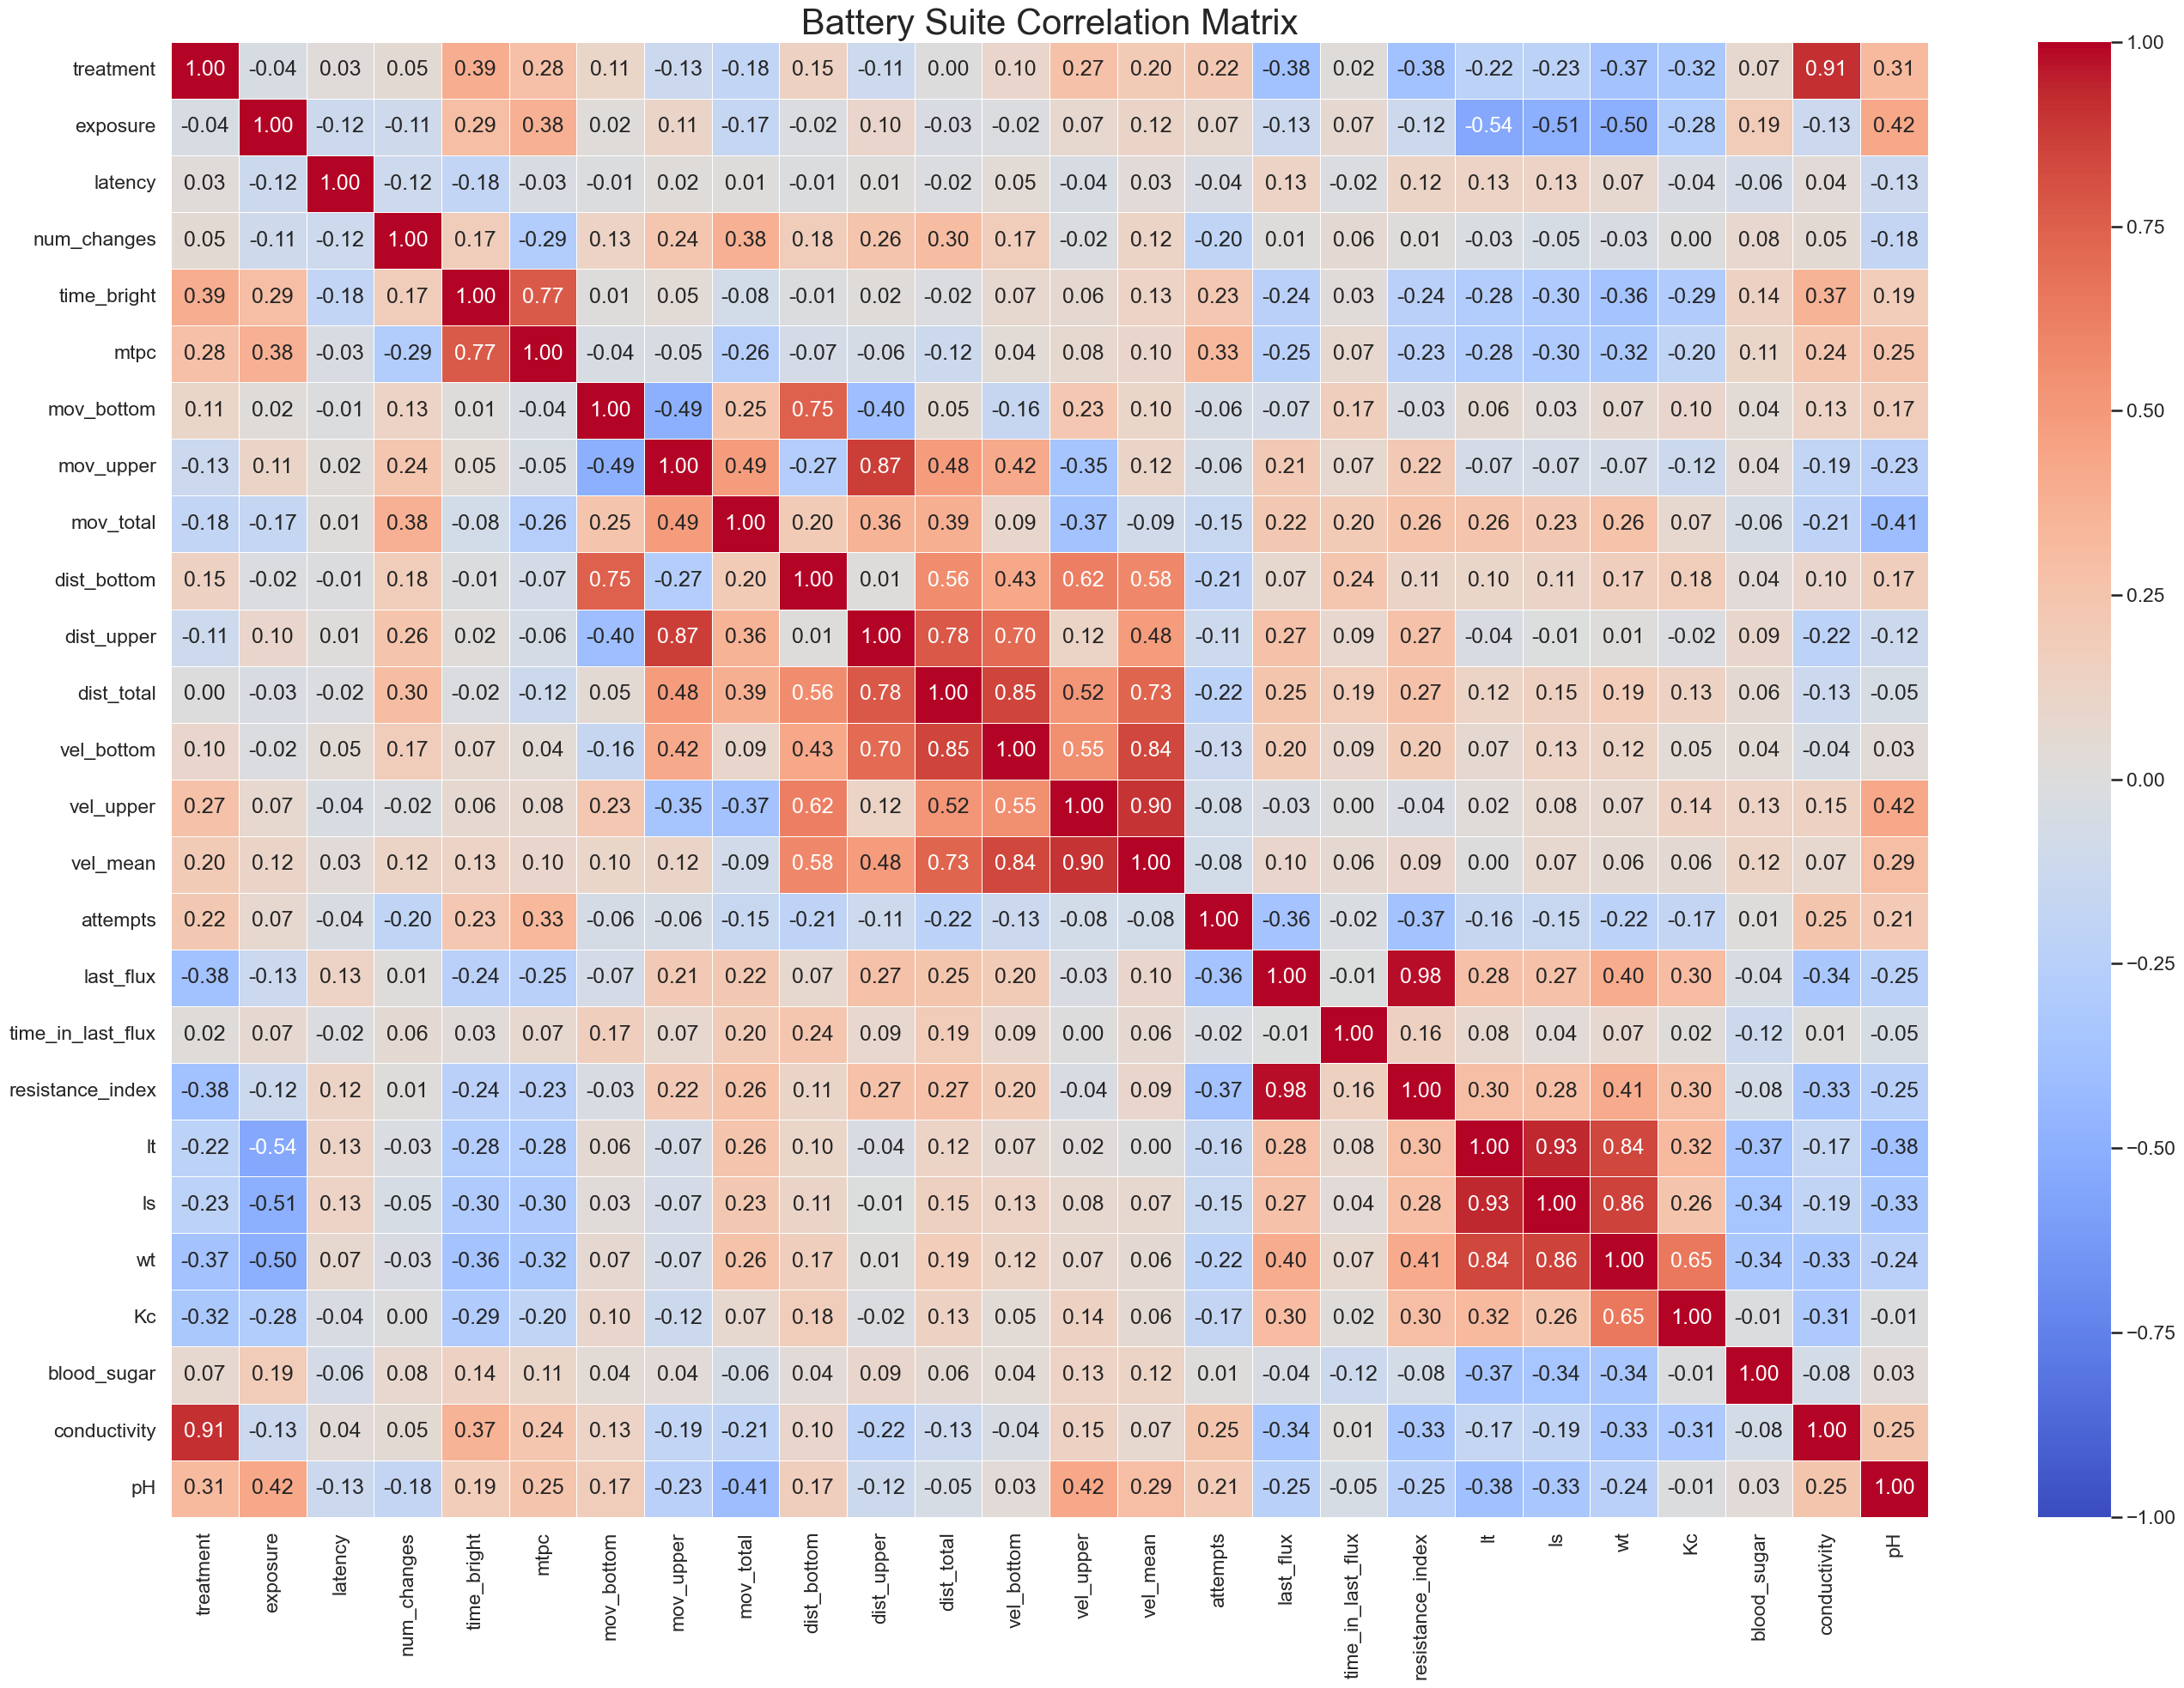

In [7]:
# Visualizing Spearman correlation matrix
plt.figure(figsize=(28, 20))

# Create a heatmap
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    fmt=".2f",         # number format
    cmap="coolwarm",   # blue=negative, red=positive
    center=0,          # center the colormap at 0
    linewidths=0.5,    # grid lines
    vmin=-1, vmax=1    # scale from -1 to 1
)

plt.title("Battery Suite Correlation Matrix", size=30)
plt.tight_layout()
plt.show()

---

<div style="text-align: center;">
    <h2>The Light-Dark Test</h2>
</div>

<p align="center">
  <img src="images/light-dark_box.jpg" alt="Light-Dark Box" width="1500">
</p>

<div style="text-align: justify; line-height: 1.6;">
  <p>
    The light–dark test evaluates anxiety-like behavior in zebrafish by exploiting their preference for dark areas. Key measures, in chronological order, include <b>latency to choose a zone</b> (longer delays indicate higher anxiety; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8770442/">Fontana et al., 2021</a>), <b>first choice</b> (initial compartment entered; <a href="https://pubmed.ncbi.nlm.nih.gov/28359882/">Facciol et al., 2017</a>), <b>time spent in the bright area</b> (less time indicates higher anxiety; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6919307/">Dahlén et al., 2019</a>), <b>number of transitions</b> (activity or risk-taking; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8770442/">Fontana et al., 2021</a>), and <b>mean time per change</b> (MTPC), reflecting exploration dynamics. This test is sensitive, reliable, and widely used as an isolated assay in zebrafish behavioral studies.
  </p>
</div>

In [8]:
# filtering LDT data only
box = df[[
    'group', 'latency', 'first_choice', 'num_changes', 'time_bright', 'mtpc'
]]

box.head()

,group,latency,first_choice,num_changes,time_bright,mtpc
fish_id,,,,,,
1BT01hCTR01,01h 0.0%,0.0,bright,23.0,402.0,17.48
1BT01hCTR02,01h 0.0%,0.0,bright,7.0,421.0,60.14
1BT01hCTR03,01h 0.0%,81.0,bright,66.0,202.0,3.06
1BT01hCTR04,01h 0.0%,0.0,bright,52.0,151.0,2.90
1BT01hCTR05,01h 0.0%,0.0,bright,40.0,110.0,2.75


In [9]:
# splitting 'group' into 'time' and 'dose'
box[['time', 'dose']] = box['group'].str.split(' ', expand=True)

#### Latency

In [10]:
# Summary statistics for latency by group
box.groupby('group')['latency'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,25.64,70.60,0.0,0.0,259.0,14
01h 0.5%,60.31,127.09,0.0,0.0,480.0,16
01h 1.0%,39.88,86.73,0.0,0.0,304.0,16
24h 0.0%,13.60,43.78,0.0,0.0,170.0,15
24h 0.5%,57.00,119.72,2.0,0.0,363.0,15
24h 1.0%,2.43,4.24,0.0,0.0,10.0,14
96h 0.0%,9.19,23.91,0.0,0.0,93.0,16
96h 0.5%,28.94,108.40,0.0,0.0,435.0,16
96h 1.0%,1.86,5.11,0.0,0.0,18.0,14


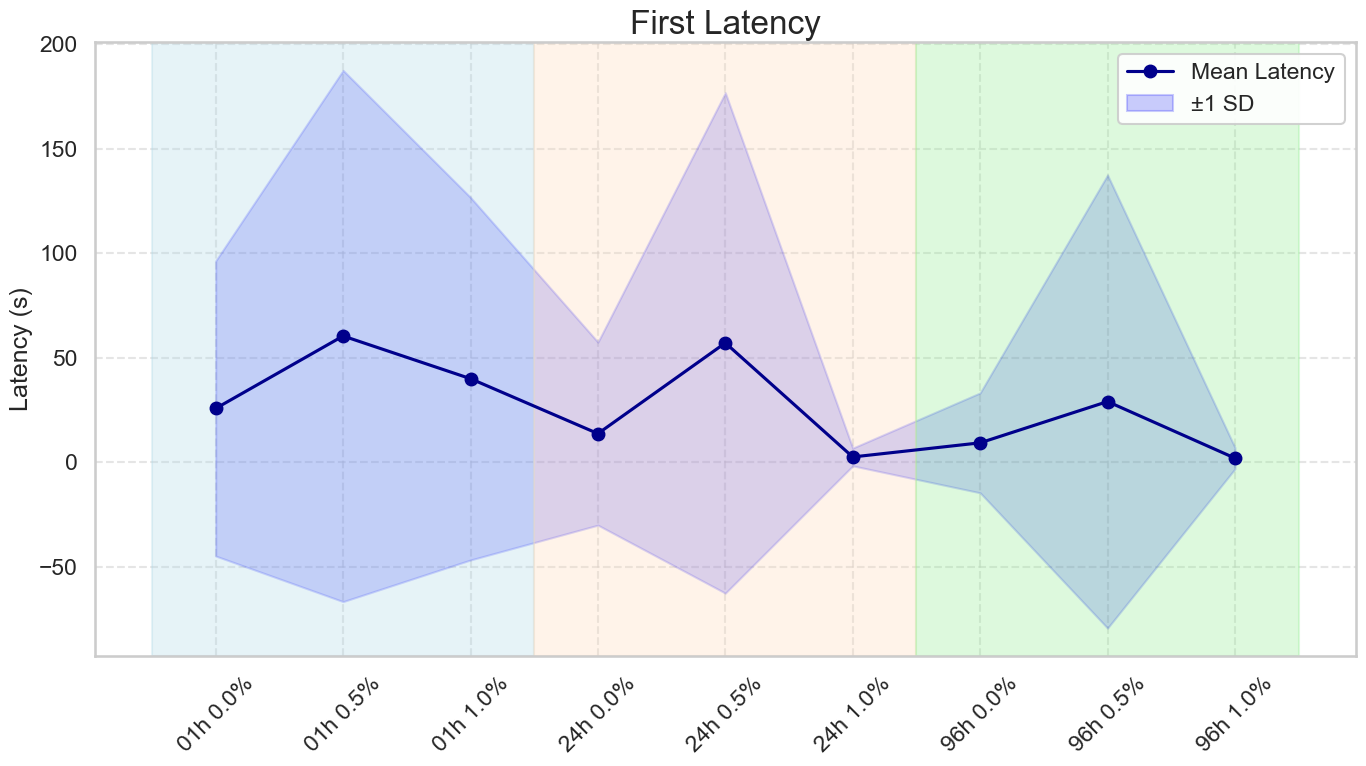

In [11]:
# Visualizing Latency by group with mean ± SD
# Define universal labels in order
labels = ['01h 0.0%', '01h 0.5%', '01h 1.0%',
          '24h 0.0%', '24h 0.5%', '24h 1.0%',
          '96h 0.0%', '96h 0.5%', '96h 1.0%']

# Mean and SD values in same order
mean_values = [25.64, 60.31, 39.88,
               13.60, 57.00, 2.43,
               9.19, 28.94, 1.86]

std_values = [70.60, 127.09, 86.73,
              43.78, 119.72, 4.24,
              23.91, 108.40, 5.11]

x = np.arange(len(labels))  # 0..8

plt.figure(figsize=(14,8))

# Plot mean ± SD
plt.plot(x, mean_values, marker='o', color='darkblue', label='Mean Latency')
plt.fill_between(x,
                 [m - s for m, s in zip(mean_values, std_values)],
                 [m + s for m, s in zip(mean_values, std_values)],
                 color='blue', alpha=0.2, label='±1 SD')

# Background regions for time clusters
plt.axvspan(-0.5, 2.5, color='#ADD8E6', alpha=0.3)  # 01h
plt.axvspan(2.5, 5.5, color='#FFDAB9', alpha=0.3)  # 24h
plt.axvspan(5.5, 8.5, color='#90EE90', alpha=0.3)  # 96h

plt.title("First Latency", size=24)
plt.ylabel("Latency (s)")
plt.xticks(x, labels, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', framealpha=0.9)
plt.tight_layout()
plt.show()


In [12]:
# Statistical analysis: Kruskal-Wallis + pairwise Mann-Whitney with Bonferroni correction
kruskal_summary(box, value_col='latency', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
               mean         std  median  min    max  count
group                                                     
01h 0.0%  25.642857   70.600291     0.0  0.0  259.0     14
01h 0.5%  60.312500  127.089322     0.0  0.0  480.0     16
01h 1.0%  39.875000   86.727831     0.0  0.0  304.0     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 0.766, p = 0.6817
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
               mean         std  median  min    max  count
group                                                     
24h 0.0%  13.600000   43.778338     0.0  0.0  170.0     15
24h 0.5%  57.000000  119.724684     2.0  0.0  363.0     15
24h 1.0%   2.428571    4.237457     0.0  0.0   10.0     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 4.027, p = 0.1335
No significant differences; skipping pairwise tests.

=== Time: 96h Summary ===
               mean         std  median  min    max  count
group                 

<p style="text-align: justify;"> In this study, <strong>latency</strong> was defined as the time required for zebrafish to make their first entry into either compartment of the LDT, serving as a measure of hesitation and exploratory drive. Across ethanol concentrations and timepoints, latency displayed variable trends: at 01h and 24h, moderate ethanol exposure (0.5%) tended to increase latency compared to controls, whereas high ethanol exposure (1.0%) often showed lower latency at later timepoints (96h). However, statistical analysis using the Kruskal-Wallis test revealed no significant differences between groups at any timepoint (01h: H = 0.77, p = 0.682; 24h: H = 4.03, p = 0.134; 96h: H = 0.67, p = 0.717), indicating that these trends did not reach significance. Despite this, the data suggest that sequential behavioral testing is feasible, as latency measures remained detectable across multiple assays, consistent with prior studies demonstrating sensitivity of the LDT to pharmacological modulation (<a href="https://pubmed.ncbi.nlm.nih.gov/26026898/" target="_blank" rel="noopener">Magno et al., 2015</a>; <a href="https://www.sciencedirect.com/science/article/abs/pii/S0091305718305586" target="_blank" rel="noopener">Mathur &amp; Guo, 2011</a>; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3804555/" target="_blank" rel="noopener">Stewart et al., 2013</a>). </p>

#### First Choice

In [13]:
# Transforming First Choice data into Numeric
clean_first_choice = {
    'bright' : 1,
    'dark' : 0
}

box['first_choice'] = box['first_choice'].replace(clean_first_choice)

In [14]:
box.groupby('group')['first_choice'].agg(['mean', 'std', 'count']).round(2)

,mean,std,count
group,,,
01h 0.0%,0.79,0.43,14
01h 0.5%,0.40,0.51,15
01h 1.0%,0.44,0.51,16
24h 0.0%,0.47,0.52,15
24h 0.5%,0.73,0.46,15
24h 1.0%,1.00,0.00,14
96h 0.0%,0.50,0.52,16
96h 0.5%,0.94,0.25,16
96h 1.0%,0.86,0.36,14


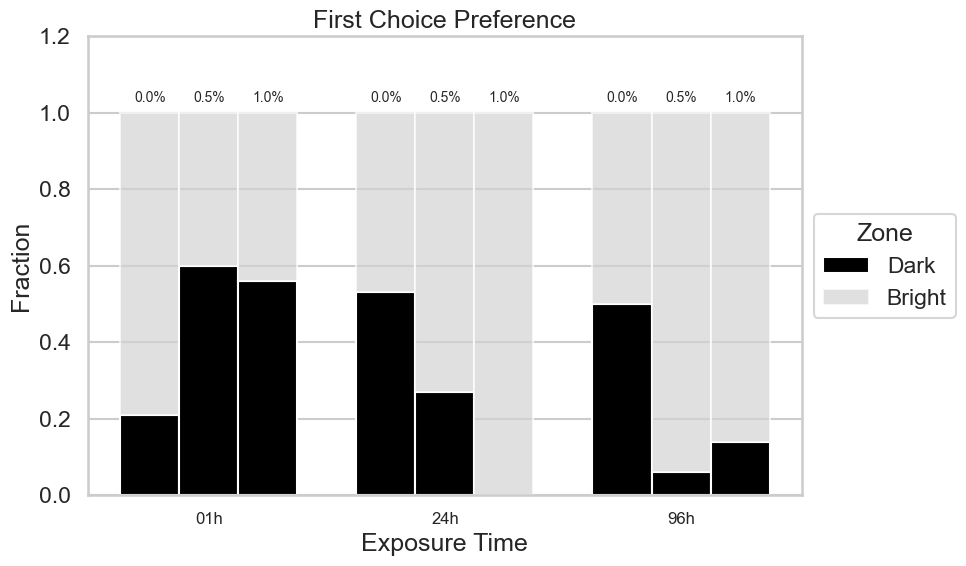

In [15]:
# Mean light preference
first_choice_means = {
    '01h': [0.79, 0.40, 0.44],
    '24h': [0.47, 0.73, 1.00],
    '96h': [0.50, 0.94, 0.86]
}

# Convert to dark fraction
dark_fraction = {t: [1 - m for m in first_choice_means[t]] for t in times}

n_groups = len(groups)
width = 0.25

x = np.arange(len(times))  # cluster centers

fig, ax = plt.subplots(figsize=(10,6))

# Plot bars per concentration
for i, g in enumerate(groups):
    bar_positions = x + (i - 1)*width
    dark_vals = [dark_fraction[t][i] for t in times]
    light_vals = [first_choice_means[t][i] for t in times]
    ax.bar(bar_positions, dark_vals, width, color='black')
    ax.bar(bar_positions, light_vals, width, bottom=dark_vals, color='lightgrey', alpha=0.7)

# X-axis labels for clusters (time)
ax.set_xticks(x)
ax.set_xticklabels(times, fontsize=12)
ax.set_xlabel('Exposure Time')

# Add concentration labels above bars
for i, t in enumerate(times):
    for j, g in enumerate(groups):
        pos = x[i] + (j - 1)*width
        ax.text(pos, 1.02, g, ha='center', va='bottom', fontsize=10)

# Labels and title
ax.set_ylabel('Fraction')
ax.set_title('First Choice Preference')

# Legend outside the chart
ax.legend(['Dark', 'Bright'], loc='center left', bbox_to_anchor=(1, 0.5), title='Zone')

# Only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_axisbelow(True)

plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()

In [16]:
# Statistical analysis for First Choice using Fisher Exact test with Bonferroni correction
# Extract time and concentration from 'group'
box['time'] = box['group'].str.extract(r'(\d+h)')[0]
box['conc'] = box['group'].str.extract(r'(\d+\.?\d*%)')[0]

# Unique timepoints
times = box['time'].unique()

# Store results
all_results = []

for t in times:
    sub = box[box['time'] == t]
    concs = sub['conc'].unique()
    
    n_comparisons = len(concs) * (len(concs)-1) / 2
    
    comparisons = []
    for c1, c2 in combinations(concs, 2):
        # Contingency table for first_choice (0 or 1)
        data1 = sub[sub['conc'] == c1]['first_choice'].value_counts()
        data2 = sub[sub['conc'] == c2]['first_choice'].value_counts()
        
        table = pd.DataFrame({c1: data1, c2: data2}).fillna(0).astype(int)
        table = table.reindex(index=[0,1], columns=[c1,c2], fill_value=0)
        
        # Fisher Exact test
        _, p = fisher_exact(table)
        
        # Bonferroni correction
        p_corr = min(p * n_comparisons, 1.0)
        
        comparisons.append({
            'Time': t,
            'Comparison': f'{c1} vs {c2}',
            'p-value': round(p_corr, 4)
        })
    
    df_results = pd.DataFrame(comparisons)
    all_results.append(df_results)
    print(f"\nPairwise Fisher Exact p-values for First Choice ({t}):")
    print(df_results.to_string(index=False))

# Optionally combine all results
final_results = pd.concat(all_results, ignore_index=True)


Pairwise Fisher Exact p-values for First Choice (01h):
Time   Comparison  p-value
 01h 0.0% vs 0.5%   0.1813
 01h 0.0% vs 1.0%   0.2152
 01h 0.5% vs 1.0%   1.0000

Pairwise Fisher Exact p-values for First Choice (24h):
Time   Comparison  p-value
 24h 0.0% vs 0.5%   0.7906
 24h 0.0% vs 1.0%   0.0066
 24h 0.5% vs 1.0%   0.2989

Pairwise Fisher Exact p-values for First Choice (96h):
Time   Comparison  p-value
 96h 0.0% vs 0.5%   0.0465
 96h 0.0% vs 1.0%   0.1730
 96h 0.5% vs 1.0%   1.0000


<p style="text-align: justify;">
In this study, <strong>first choice</strong> was defined as the initial compartment selected by zebrafish in the LDT, reflecting early preference and motivational bias. Across ethanol concentrations and timepoints, first choice behavior was both time- and concentration-dependent. At 01h, no comparisons reached statistical significance, suggesting minimal acute effects of ethanol on initial preference. By 24h, the difference between <em>0.0%</em> and <em>1.0%</em> ethanol reached significance (p = 0.0066), indicating a delayed effect of higher ethanol exposure on first choice behavior. At 96h, <em>0.0%</em> versus <em>0.5%</em> also showed a significant difference (p = 0.0465), reflecting a concentration-dependent modulation that emerges over time. Overall, these patterns demonstrate that initial compartment preference in zebrafish is sensitive to both ethanol concentration and exposure duration, emphasizing the importance of temporal dynamics in behavioral pharmacology (<a href="https://pubmed.ncbi.nlm.nih.gov/26026898/" target="_blank" rel="noopener">Magno et al., 2015</a>; <a href="https://www.sciencedirect.com/science/article/abs/pii/S0091305718305586" target="_blank" rel="noopener">Mathur &amp; Guo, 2011</a>; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3804555/" target="_blank" rel="noopener">Stewart et al., 2013</a>).
</p>

#### Time in the Bright

In [17]:
box.groupby('group')['time_bright'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,145.57,128.05,122.0,0.0,421.0,14
01h 0.5%,156.31,136.68,142.0,0.0,491.0,16
01h 1.0%,176.69,114.48,159.0,0.0,360.0,16
24h 0.0%,104.67,50.77,97.0,4.0,203.0,15
24h 0.5%,188.20,112.65,179.0,10.0,432.0,15
24h 1.0%,261.21,87.05,243.5,150.0,435.0,14
96h 0.0%,166.25,135.88,117.5,0.0,461.0,16
96h 0.5%,269.06,97.51,268.0,35.0,453.0,16
96h 1.0%,367.93,148.25,439.0,83.0,480.0,14


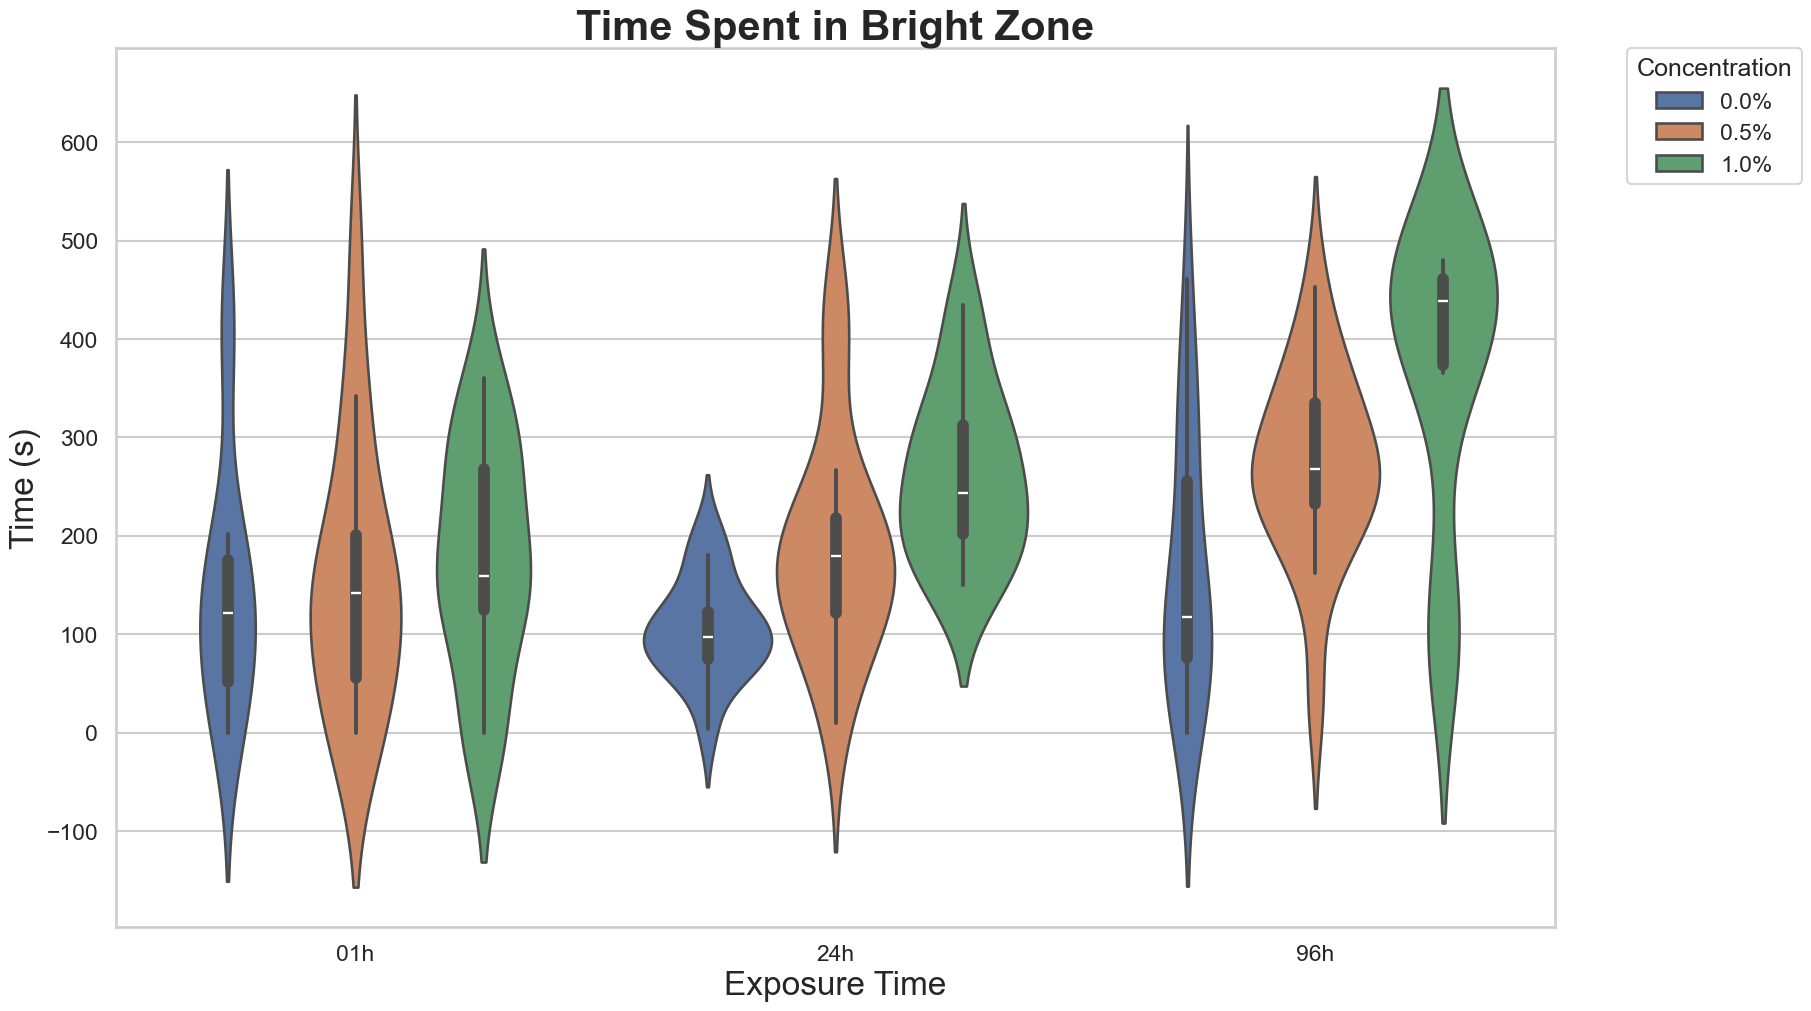

In [18]:
# Visualizing Time in Bright Zone by group with violin + boxplot
plt.figure(figsize=(18, 10), constrained_layout=True)

# Generate violin + boxplot
sns.violinplot(
    data=box,
    x='time',
    y='time_bright',
    hue='dose',
    split=False,
    inner='box'
)

# Name axes and title
plt.ylabel('Time (s)', size=24)
plt.xlabel('Exposure Time', size=24)
plt.title("Time Spent in Bright Zone", size=30, weight='bold')

# push legend fully outside
plt.legend(
    title='Concentration',
    bbox_to_anchor=(1.05, 1),   # 5% outside the axes
    loc='upper left',
    borderaxespad=0
)

plt.show()

In [19]:
# Statistical analysis for Time in Bright Zone using Kruskal-Wallis + pairwise Mann-Whitney with Bonferroni correction
kruskal_summary(box, value_col='time_bright', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
                mean         std  median  min    max  count
group                                                      
01h 0.0%  145.571429  128.052101   122.0  0.0  421.0     14
01h 0.5%  156.312500  136.682464   142.0  0.0  491.0     16
01h 1.0%  176.687500  114.476035   159.0  0.0  360.0     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 1.147, p = 0.5635
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
                mean         std  median    min    max  count
group                                                        
24h 0.0%  104.666667   50.773540    97.0    4.0  203.0     15
24h 0.5%  188.200000  112.650027   179.0   10.0  432.0     15
24h 1.0%  261.214286   87.045681   243.5  150.0  435.0     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 19.145, p = 0.0001
Significant differences found; running pairwise tests...
24h 24h 0.0% vs 24h 0.5% p = 0.0322
24h 24h 0.0% vs 24h 1.0% p = 0.0001
24h 24h 0.5

<p style="text-align: justify;"> In this study, <strong>time in the bright</strong> reflects the total bright-zone activity of zebrafish (in seconds), serving as a proxy for anxiety-like behavior. At 01h, no significant differences were detected across ethanol concentrations, likely due to high variability and minimal acute effects. By 24h, significant increases were observed for <em>0.0%</em> versus <em>0.5%</em> (p = 0.0322) and <em>0.0%</em> versus <em>1.0%</em> (p = 0.0001), demonstrating a delayed, dose-dependent enhancement of activity. At 96h, significant differences persisted, notably between <em>0.0%</em> and <em>1.0%</em> (p = 0.0055) and between <em>0.5%</em> and <em>1.0%</em> (p = 0.0401), highlighting that ethanol-induced behavioral modulation strengthens over time and with higher concentrations. These results indicate that zebrafish locomotor activity in bright zones is sensitive to both ethanol dose and exposure duration, emphasizing the temporal dynamics of ethanol’s effects on exploratory behavior. </p>

#### Number of Changes

In [20]:
box.groupby('group')['num_changes'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,25.57,18.76,24.5,0.0,66.0,14
01h 0.5%,23.44,19.64,25.5,0.0,60.0,16
01h 1.0%,27.12,28.06,18.5,0.0,108.0,16
24h 0.0%,18.93,8.88,20.0,2.0,35.0,15
24h 0.5%,21.27,13.91,26.0,0.0,45.0,15
24h 1.0%,27.21,11.21,28.0,2.0,43.0,14
96h 0.0%,15.44,10.11,17.0,0.0,33.0,16
96h 0.5%,27.44,13.21,32.0,1.0,47.0,16
96h 1.0%,12.57,11.69,10.0,0.0,36.0,14


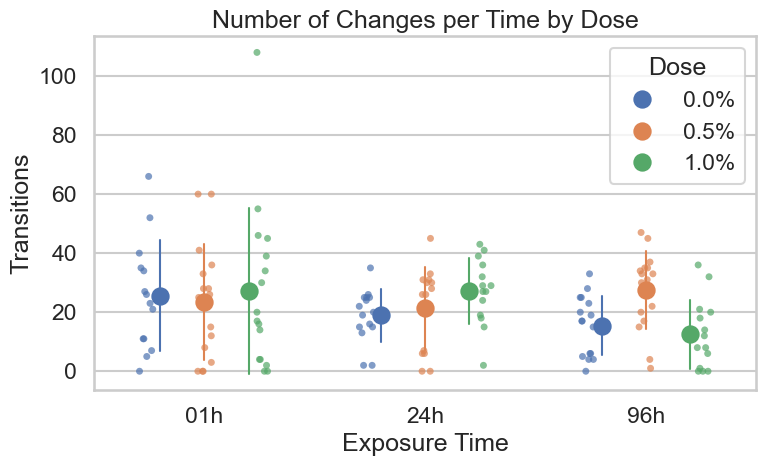

In [21]:
# Visualizing Number of Changes by group with strip + point plot
plt.figure(figsize=(8,5))

# plot the individual points, no legend
sns.stripplot(
    data=box,
    x='time',
    y='num_changes',
    hue='dose',
    dodge=True,
    alpha=0.7,
    legend=False  # disable legend here
)

# plot the means with SD, only this will have the legend
sns.pointplot(
    data=box,
    x='time',
    y='num_changes',
    hue='dose',
    dodge=0.4,
    ci='sd',
    markers='o',
    linestyles='',
    errwidth=1.5  # optional, thicker error bars
)

plt.title("Number of Changes per Time by Dose")
plt.ylabel("Transitions")
plt.xlabel("Exposure Time")
plt.legend(title="Dose")  # only one legend
plt.tight_layout()
plt.show()

In [22]:
kruskal_summary(box, value_col='num_changes', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
               mean        std  median  min    max  count
group                                                    
01h 0.0%  25.571429  18.764591    24.5  0.0   66.0     14
01h 0.5%  23.437500  19.643383    25.5  0.0   60.0     16
01h 1.0%  27.125000  28.061540    18.5  0.0  108.0     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 0.131, p = 0.9365
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
               mean        std  median  min   max  count
group                                                   
24h 0.0%  18.933333   8.875863    20.0  2.0  35.0     15
24h 0.5%  21.266667  13.910257    26.0  0.0  45.0     15
24h 1.0%  27.214286  11.205621    28.0  2.0  43.0     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 4.852, p = 0.0884
No significant differences; skipping pairwise tests.

=== Time: 96h Summary ===
               mean        std  median  min   max  count
group                                  

<p style="text-align: justify;">In this study, <strong>number of changes</strong> reflects the frequency of zebrafish transitions between zones, serving as a measure of exploratory activity. At 01h and 24h, no significant differences were detected across ethanol concentrations, likely due to high variability within groups and minimal acute effects. By 96h, significant differences emerged, particularly between <em>0.0%</em> and <em>0.5%</em> (p = 0.0325) and between <em>0.5%</em> and <em>1.0%</em> (p = 0.017), indicating that the intermediate ethanol dose increased exploratory behavior relative to both control and high-dose groups. These findings suggest that ethanol-induced modulation of zebrafish activity is not immediate but develops over time, with the intermediate dose eliciting the strongest effect at later stages, highlighting the importance of both dose and exposure duration in behavioral responses. </p>

#### Mean Time per Change (MTPC)

In [23]:
box.groupby('group')['mtpc'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,8.56,15.37,3.73,0.00,60.14,14
01h 0.5%,14.55,39.89,4.72,0.00,163.67,16
01h 1.0%,12.59,21.76,5.88,0.00,90.00,16
24h 0.0%,8.86,14.47,4.84,2.00,60.50,15
24h 0.5%,29.58,48.34,6.10,1.67,162.00,15
24h 1.0%,24.18,55.82,7.99,5.51,217.50,14
96h 0.0%,17.66,29.52,6.87,0.00,115.25,16
96h 0.5%,37.81,110.85,7.62,5.23,453.00,16
96h 1.0%,156.71,209.50,46.23,3.53,480.00,14


In [24]:
# Checking skewness for num_changes
print("Skewness for number of changes:", box['num_changes'].skew().round(3))
print() # blank line for readability
print("Since skewness > 1, data is highly skewed. Therefore, a logger scale will be used for visualization.")

Skewness for number of changes: 1.242

Since skewness > 1, data is highly skewed. Therefore, a logger scale will be used for visualization.


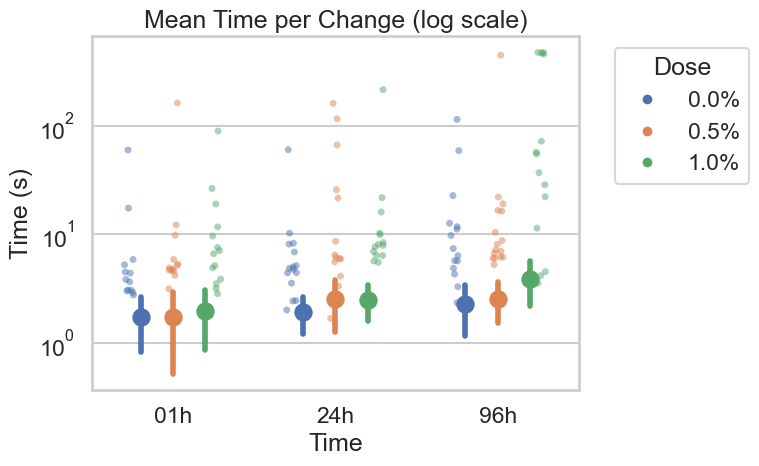

In [25]:
# Visualizing Mean Time per Change by group with strip + point plot (log scale)
plt.figure(figsize=(8,5))

# Individual points (raw scale), no legend
sns.stripplot(
    data=box, 
    x='time', 
    y='mtpc', 
    hue='dose', 
    dodge=True, 
    alpha=0.5, 
    jitter=True,
    legend=False  # suppress legend here
)

# Overlay log-transformed means with SD error bars
sns.pointplot(
    data=box, 
    x='time', 
    y=np.log1p(box['mtpc']), 
    hue='dose', 
    dodge=0.4, 
    ci='sd', 
    markers='o', 
    linestyles='',
    estimator=np.mean,
    legend=False  # suppress legend here too
)

# Create a single legend manually
from matplotlib.lines import Line2D

colors = sns.color_palette()[:box['dose'].nunique()]
legend_elements = [Line2D([0], [0], marker='o', color='w', label=str(d),
                          markerfacecolor=col, markersize=8)
                   for d, col in zip(sorted(box['dose'].unique()), colors)]

plt.legend(handles=legend_elements, title="Dose", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.yscale('log')
plt.title("Mean Time per Change (log scale)")
plt.ylabel("Time (s)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

In [26]:
# Statistical analysis for Mean Time per Change using Kruskal-Wallis + pairwise Mann-Whitney with Bonferroni correction
kruskal_summary(box, value_col='mtpc', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
               mean        std  median  min     max  count
group                                                     
01h 0.0%   8.555714  15.367132   3.730  0.0   60.14     14
01h 0.5%  14.551250  39.893271   4.715  0.0  163.67     16
01h 1.0%  12.594375  21.762213   5.875  0.0   90.00     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 2.105, p = 0.3490
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
               mean        std  median   min    max  count
group                                                     
24h 0.0%   8.864667  14.473710   4.840  2.00   60.5     15
24h 0.5%  29.584667  48.344550   6.100  1.67  162.0     15
24h 1.0%  24.177857  55.822277   7.995  5.51  217.5     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 6.656, p = 0.0359
Significant differences found; running pairwise tests...
24h 24h 0.0% vs 24h 0.5% p = 0.5132
24h 24h 0.0% vs 24h 1.0% p = 0.0233
24h 24h 0.5% vs 24h 1.0% p = 1.0

<p style="text-align: justify;">In this study, <strong>number of changes</strong> reflects the frequency of zebrafish transitions between zones, serving as a measure of exploratory activity. At 01h, no significant differences were detected across ethanol concentrations, likely due to minimal acute effects and high within-group variability. By 24h, significant differences emerged, with the <em>1.0%</em> ethanol group showing higher exploratory activity compared to <em>0.0%</em> (p = 0.0233), while the <em>0.5%</em> group remained intermediate and not significantly different from either. At 96h, the <em>1.0%</em> group displayed a marked increase in mean exploratory activity, although post-hoc pairwise comparisons were not statistically significant due to extreme variability, suggesting that a few individuals drove the elevated mean. These results indicate that ethanol-induced changes in zebrafish activity develop over time, with the highest concentration producing the strongest overall response, highlighting both dose-dependence and the impact of inter-individual variability in behavioral outcomes.</p>

---

<div style="text-align: center;">
    <h2>The Novel Tank Test</h2>
</div>

<div style="text-align: center;">
    <img src="images/ntt.jpg" width="1200" alt="Novel Tank Image">
</div>

In [27]:
# Creating a new DataFrame with selected NTT columns
ntt = df[[
    'group', 'mov_bottom', 'mov_upper',
       'mov_total', 'dist_bottom', 'dist_upper', 'dist_total', 'vel_bottom',
       'vel_upper', 'vel_mean']]

In [28]:
# Splitting 'group' into 'time' and 'concentration'
ntt[['time', 'conc']] = ntt['group'].str.split(' ', expand=True)
ntt.head()

,group,mov_bottom,mov_upper,mov_total,dist_bottom,dist_upper,dist_total,vel_bottom,vel_upper,vel_mean,time,conc
fish_id,,,,,,,,,,,,
1BT01hCTR01,01h 0.0%,370.0,84.0,454.0,1344.0,399.0,1743.0,3.63,4.75,4.19,01h,0.0%
1BT01hCTR02,01h 0.0%,87.0,0.0,87.0,723.1,0.0,723.1,8.31,NaN,8.31,01h,0.0%
1BT01hCTR03,01h 0.0%,257.0,172.0,429.0,3492.8,2325.5,5818.3,13.59,13.52,13.56,01h,0.0%
1BT01hCTR04,01h 0.0%,262.0,180.0,442.0,2653.0,1832.2,4485.2,10.13,10.18,10.15,01h,0.0%
1BT01hCTR05,01h 0.0%,196.0,250.0,446.0,2504.6,3333.7,5838.3,12.78,13.33,13.06,01h,0.0%


### Time of Movement

#### Movement on the Bottom Portion

In [29]:
# Summary Table for Movement in the Bottom Zone of the Tank
ntt.groupby('group')['mov_bottom'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,223.36,98.16,230.0,54.0,370.0,14
01h 0.5%,191.06,113.10,219.5,0.0,380.0,16
01h 1.0%,230.56,134.42,249.0,0.0,439.0,16
24h 0.0%,278.67,84.02,278.0,131.0,446.0,15
24h 0.5%,260.87,62.59,243.0,179.0,384.0,15
24h 1.0%,257.07,74.73,259.0,82.0,353.0,14
96h 0.0%,205.69,69.71,216.0,21.0,300.0,16
96h 0.5%,202.88,97.21,230.5,3.0,320.0,16
96h 1.0%,277.64,91.64,290.5,117.0,391.0,14


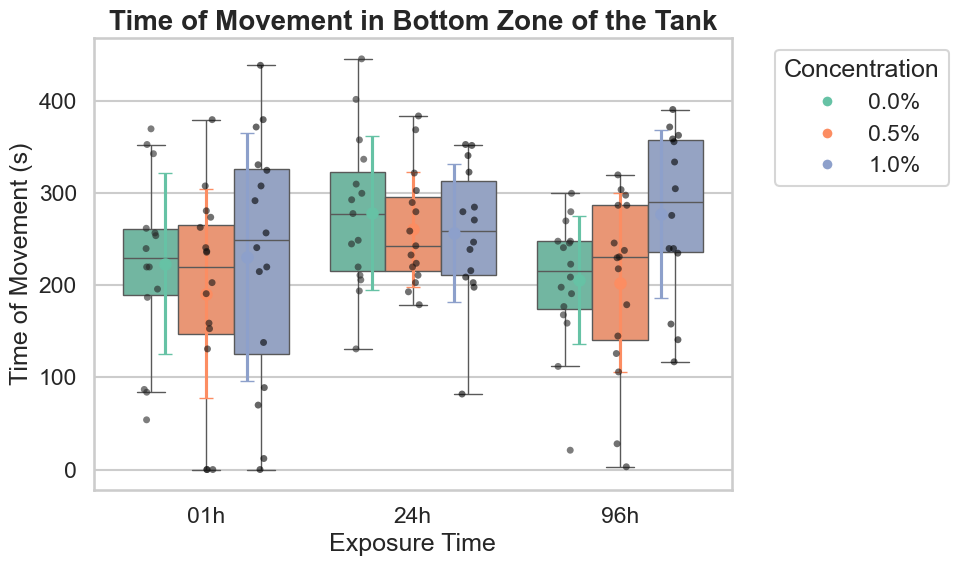

In [30]:
plt.figure(figsize=(10,6))

# Boxplot per concentration per time
sns.boxplot(
    data=ntt,
    x='time',
    y='mov_bottom',
    hue='conc',
    palette="Set2",
    showfliers=False  # optional: hide outliers since stripplot shows them
)

# Overlay raw points (jittered)
sns.stripplot(
    data=ntt,
    x='time',
    y='mov_bottom',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    alpha=0.6,
    legend=False
)

# Overlay mean ± SD
for i, conc in enumerate(sorted(ntt['conc'].unique())):
    for j, t in enumerate(sorted(ntt['time'].unique())):
        subset = ntt[(ntt['conc'] == conc) & (ntt['time'] == t)]
        mean_val = subset['mov_bottom'].mean()
        sd_val = subset['mov_bottom'].std()
        plt.errorbar(
            x=j + i*0.2 - 0.2,  # adjust for dodge, matches boxplot positions
            y=mean_val,
            yerr=sd_val,
            fmt='o',
            color=sns.color_palette("Set2")[i],
            capsize=5,
            markersize=8
        )

# Optional: log scale if desired
# plt.yscale('log')

# Custom legend for concentrations
colors = sns.color_palette("Set2")[:ntt['conc'].nunique()]
legend_elements = [Line2D([0], [0], marker='o', color='w', label=str(c),
                          markerfacecolor=col, markersize=8)
                   for c, col in zip(sorted(ntt['conc'].unique()), colors)]
plt.legend(handles=legend_elements, title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Time of Movement in Bottom Zone of the Tank", fontsize=20, weight='bold')
plt.ylabel("Time of Movement (s)")
plt.xlabel("Exposure Time")
plt.tight_layout()
plt.show()

In [31]:
# Statistical analysis for Movement in Bottom Zone using Kruskal-Wallis + pairwise Mann-Whitney with Bonferroni correction
kruskal_summary(ntt, value_col='mov_bottom', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
                mean         std  median   min    max  count
group                                                       
01h 0.0%  223.357143   98.158120   230.0  54.0  370.0     14
01h 0.5%  191.062500  113.101411   219.5   0.0  380.0     16
01h 1.0%  230.562500  134.421709   249.0   0.0  439.0     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 1.165, p = 0.5585
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
                mean        std  median    min    max  count
group                                                       
24h 0.0%  278.666667  84.023523   278.0  131.0  446.0     15
24h 0.5%  260.866667  62.594918   243.0  179.0  384.0     15
24h 1.0%  257.071429  74.726645   259.0   82.0  353.0     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 0.504, p = 0.7771
No significant differences; skipping pairwise tests.

=== Time: 96h Summary ===
                mean        std  median    min    max  count


#### Movement on the Upper Portion

In [32]:
# Summary Table for Movement in the Upper Zone of the Tank
ntt.groupby('group')['mov_upper'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,121.50,88.78,137.0,0.0,250.0,14
01h 0.5%,147.69,103.28,170.5,0.0,309.0,16
01h 1.0%,150.12,116.52,147.0,0.0,378.0,16
24h 0.0%,127.73,84.40,126.0,0.0,254.0,15
24h 0.5%,173.87,71.46,189.0,25.0,277.0,15
24h 1.0%,107.64,87.67,95.5,0.0,292.0,14
96h 0.0%,176.56,79.49,183.0,6.0,316.0,16
96h 0.5%,224.88,90.64,201.5,101.0,396.0,16
96h 1.0%,91.07,82.64,73.0,5.0,281.0,14


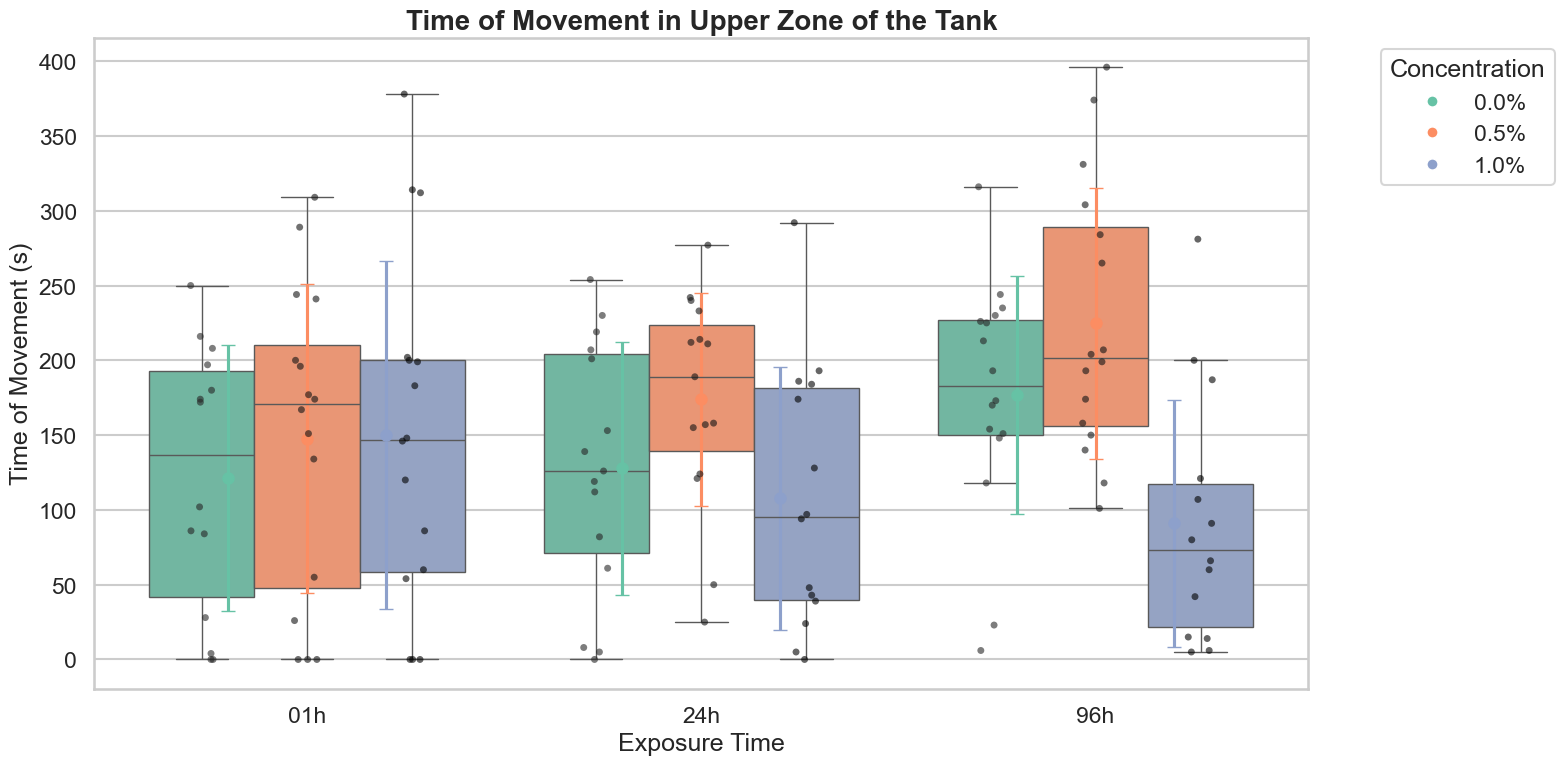

In [33]:
# Visualizing Movement in the Upper Zone of the Tank
plt.figure(figsize=(16,8))

# Boxplot per concentration per time
sns.boxplot(
    data=ntt,
    x='time',
    y='mov_upper',
    hue='conc',
    palette="Set2",
    showfliers=False  # optional: hide outliers since stripplot shows them
)

# Overlay raw points (jittered)
sns.stripplot(
    data=ntt,
    x='time',
    y='mov_upper',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    alpha=0.6,
    legend=False
)

# Overlay mean ± SD
for i, conc in enumerate(sorted(ntt['conc'].unique())):
    for j, t in enumerate(sorted(ntt['time'].unique())):
        subset = ntt[(ntt['conc'] == conc) & (ntt['time'] == t)]
        mean_val = subset['mov_upper'].mean()
        sd_val = subset['mov_upper'].std()
        plt.errorbar(
            x=j + i*0.2 - 0.2,  # adjust for dodge, matches boxplot positions
            y=mean_val,
            yerr=sd_val,
            fmt='o',
            color=sns.color_palette("Set2")[i],
            capsize=5,
            markersize=8
        )

# Optional: log scale if desired
# plt.yscale('log')

# Custom legend for concentrations
colors = sns.color_palette("Set2")[:ntt['conc'].nunique()]
legend_elements = [Line2D([0], [0], marker='o', color='w', label=str(c),
                          markerfacecolor=col, markersize=8)
                   for c, col in zip(sorted(ntt['conc'].unique()), colors)]
plt.legend(handles=legend_elements, title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Time of Movement in Upper Zone of the Tank", fontsize=20, weight='bold')
plt.ylabel("Time of Movement (s)")
plt.xlabel("Exposure Time")
plt.tight_layout()
plt.show()

In [34]:
# Statistical analysis for Movement in Upper Zone using Kruskal-Wallis + pairwise Mann-Whitney with Bonferroni correction
kruskal_summary(ntt, value_col='mov_upper', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
              mean         std  median  min    max  count
group                                                    
01h 0.0%  121.5000   88.783878   137.0  0.0  250.0     14
01h 0.5%  147.6875  103.280020   170.5  0.0  309.0     16
01h 1.0%  150.1250  116.518883   147.0  0.0  378.0     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 0.277, p = 0.8704
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
                mean        std  median   min    max  count
group                                                      
24h 0.0%  127.733333  84.403340   126.0   0.0  254.0     15
24h 0.5%  173.866667  71.464144   189.0  25.0  277.0     15
24h 1.0%  107.642857  87.673877    95.5   0.0  292.0     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 5.516, p = 0.0634
No significant differences; skipping pairwise tests.

=== Time: 96h Summary ===
                mean        std  median    min    max  count
group               

#### Total Movement

In [35]:
# Summary Table for Total Movement Time in the Tank
ntt.groupby('group')['mov_total'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,344.86,157.51,432.5,54.0,454.0,14
01h 0.5%,338.75,174.62,434.0,0.0,455.0,16
01h 1.0%,380.69,135.68,438.5,0.0,456.0,16
24h 0.0%,406.40,80.54,424.0,131.0,465.0,15
24h 0.5%,434.73,15.17,435.0,409.0,457.0,15
24h 1.0%,364.71,44.59,372.5,242.0,421.0,14
96h 0.0%,382.25,96.26,421.0,44.0,439.0,16
96h 0.5%,427.75,16.09,429.5,399.0,453.0,16
96h 1.0%,368.71,57.90,389.5,245.0,427.0,14


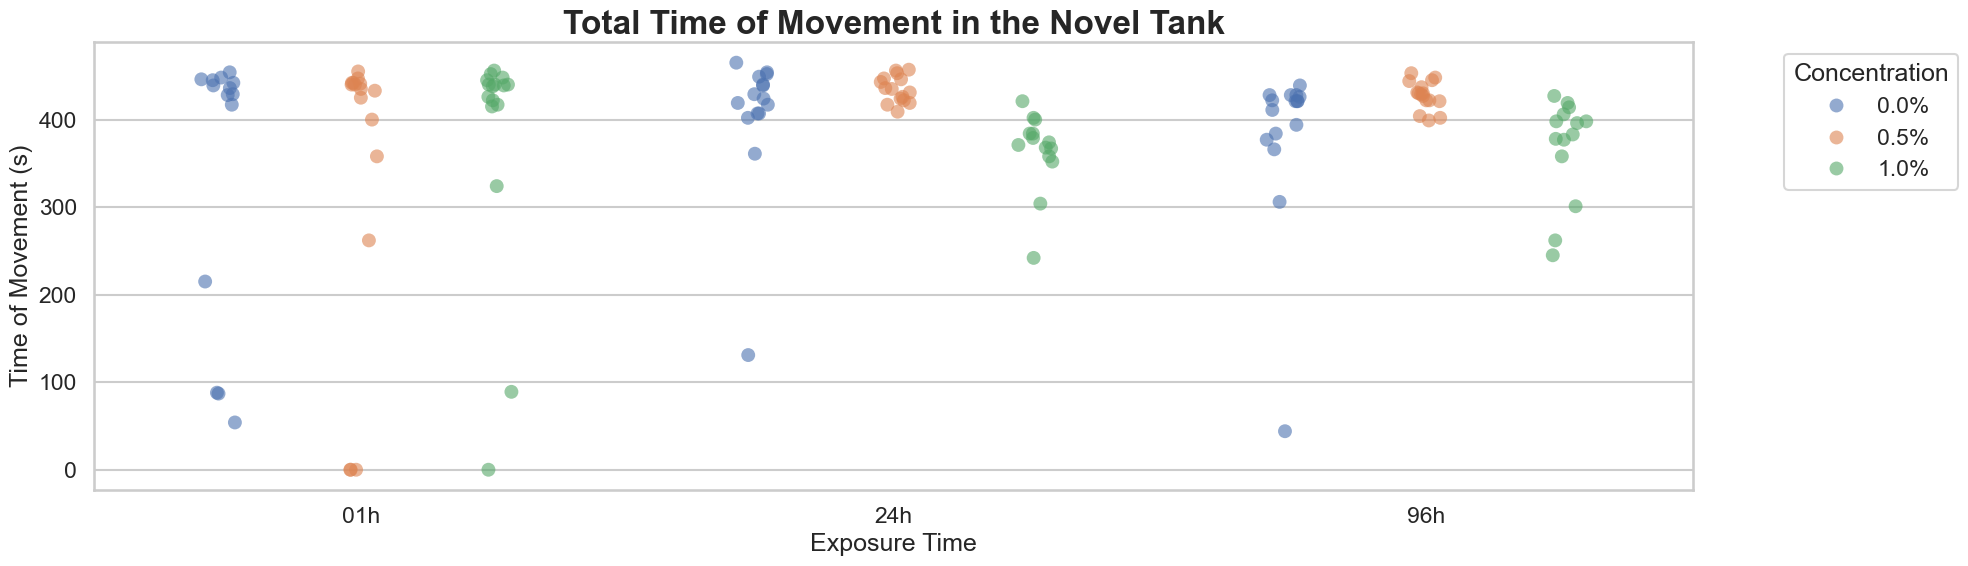

In [36]:
# Visualizing Total Movement Time in the Tank
plt.figure(figsize=(20,6))
sns.stripplot(
    data=ntt,
    x='time',
    y='mov_total',
    hue='conc',
    dodge=True,
    jitter=True,
    alpha=0.6,
    size=10,
    legend=True
)

plt.title("Total Time of Movement in the Novel Tank", fontsize=24, weight='bold')
plt.ylabel("Time of Movement (s)")
plt.xlabel("Exposure Time")
plt.legend(title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
# Summary statistics for total movement time by group
kruskal_summary(ntt, value_col='mov_total', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
                mean         std  median   min    max  count
group                                                       
01h 0.0%  344.857143  157.514276   432.5  54.0  454.0     14
01h 0.5%  338.750000  174.616723   434.0   0.0  455.0     16
01h 1.0%  380.687500  135.680369   438.5   0.0  456.0     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 0.324, p = 0.8505
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
                mean        std  median    min    max  count
group                                                       
24h 0.0%  406.400000  80.535529   424.0  131.0  465.0     15
24h 0.5%  434.733333  15.167949   435.0  409.0  457.0     15
24h 1.0%  364.714286  44.587733   372.5  242.0  421.0     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 21.388, p = 0.0000
Significant differences found; running pairwise tests...
24h 24h 0.0% vs 24h 0.5% p = 0.7614
24h 24h 0.0% vs 24h 1.0% p = 0.0032
24h 24h 0.5

### Distance Covered

#### Distance swam in the Bottom Portion

In [38]:
# Summary Table for Distance Travelled in the Bottom Zone of the Tank
ntt.groupby('group')['dist_bottom'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,2270.39,1128.16,2541.15,253.70,4329.70,14
01h 0.5%,2199.85,1252.45,2406.10,0.00,3721.20,16
01h 1.0%,3693.83,2240.55,3855.95,0.00,7570.40,16
24h 0.0%,3216.38,1155.48,3296.07,1207.55,5861.27,15
24h 0.5%,2997.70,918.64,3103.05,1885.65,4951.99,15
24h 1.0%,2989.16,912.04,2768.18,1218.65,4549.99,14
96h 0.0%,2622.02,1119.62,2666.44,261.30,5218.95,16
96h 0.5%,2295.28,1155.14,2616.83,65.74,3803.60,16
96h 1.0%,2869.22,983.31,3304.30,1289.81,4067.99,14


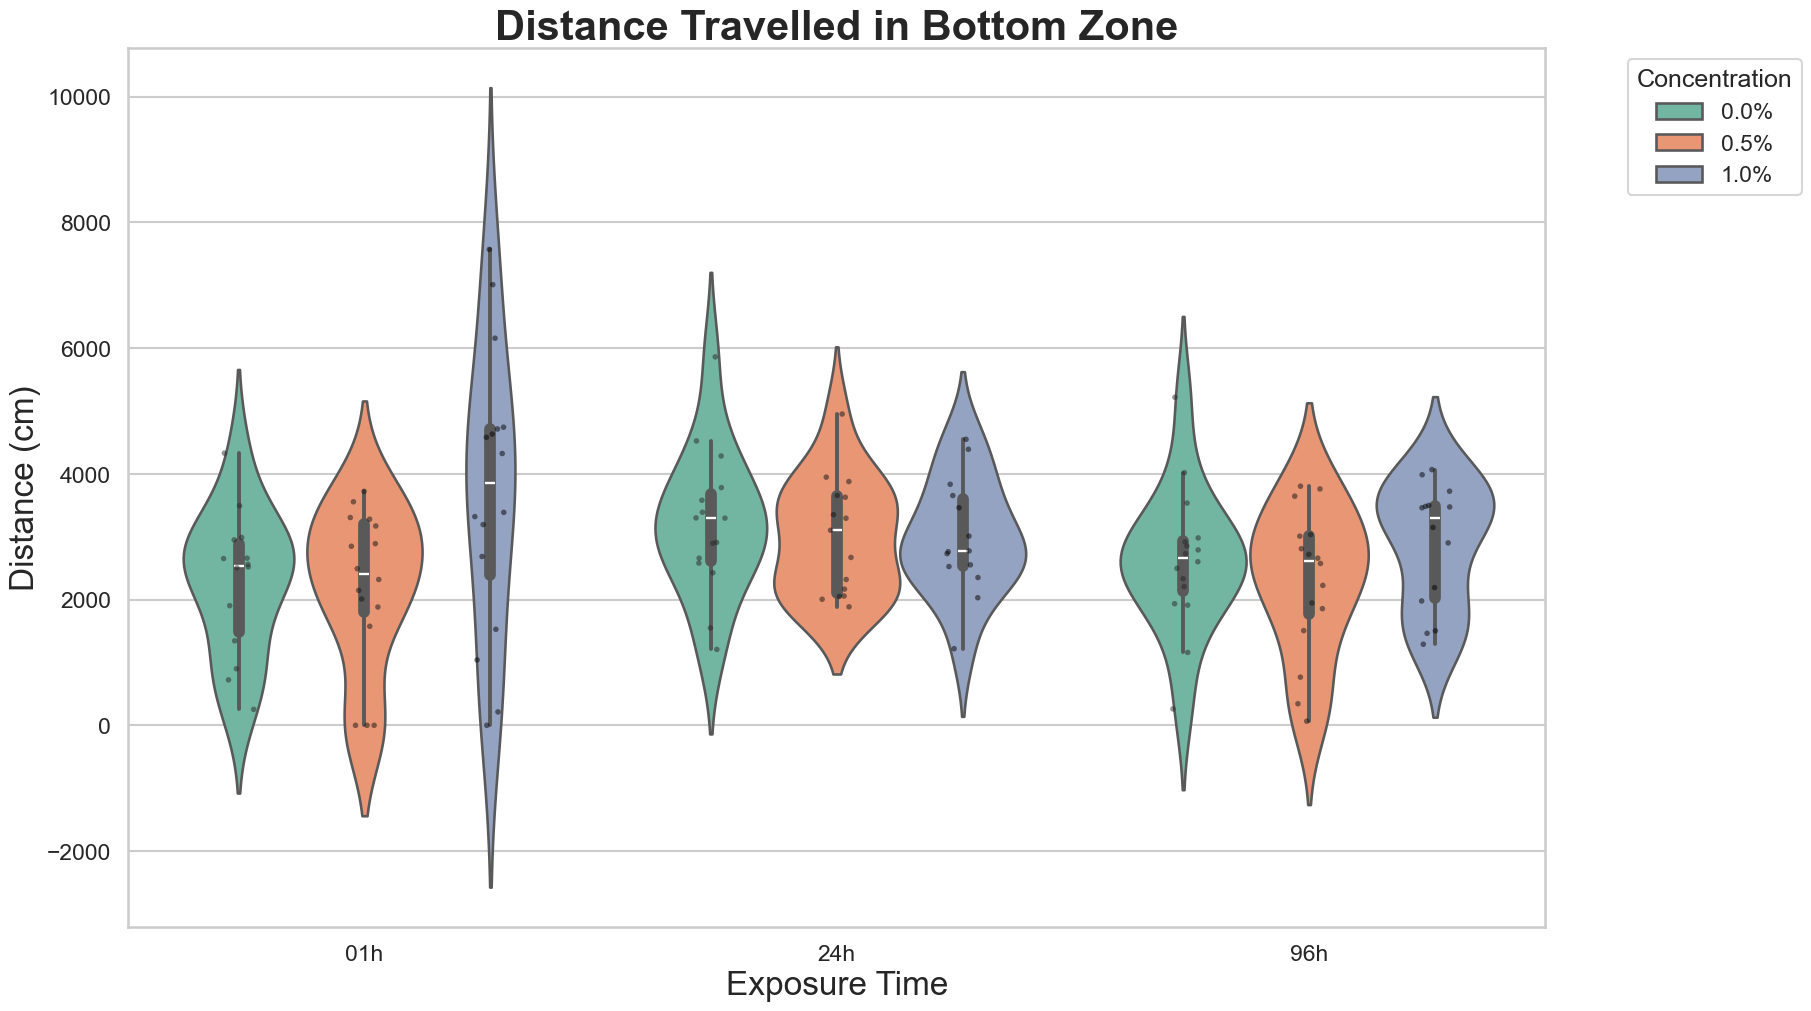

In [39]:
# Visualizing Distance Travelled in the Bottom Zone of the Tank
plt.figure(figsize=(18,10), constrained_layout=True)

sns.violinplot(
    data=ntt,
    x='time',
    y='dist_bottom',
    hue='conc',
    split=False,
    inner='box',
    palette='Set2'
)

# Overlay jittered raw points
sns.stripplot(
    data=ntt,
    x='time',
    y='dist_bottom',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    size=4,
    alpha=0.5,
    legend=False
)

plt.ylabel("Distance (cm)", size=24)
plt.xlabel("Exposure Time", size=24)
plt.title("Distance Travelled in Bottom Zone", fontsize=30, weight='bold')
plt.legend(title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [40]:
# kruskal_summary for Distance Travelled in Bottom Zone
kruskal_summary(ntt, value_col='dist_bottom', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
                 mean          std   median    min     max  count
group                                                            
01h 0.0%  2270.392857  1128.160410  2541.15  253.7  4329.7     14
01h 0.5%  2199.850000  1252.445183  2406.10    0.0  3721.2     16
01h 1.0%  3693.825625  2240.551269  3855.95    0.0  7570.4     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 6.620, p = 0.0365
Significant differences found; running pairwise tests...
01h 01h 0.0% vs 01h 0.5% p = 1.0000
01h 01h 0.0% vs 01h 1.0% p = 0.0969
01h 01h 0.5% vs 01h 1.0% p = 0.0781

=== Time: 24h Summary ===
                 mean          std    median      min      max  count
group                                                                
24h 0.0%  3216.380000  1155.478551  3296.070  1207.55  5861.27     15
24h 0.5%  2997.695333   918.636383  3103.050  1885.65  4951.99     15
24h 1.0%  2989.165000   912.042360  2768.185  1218.65  4549.99     14

=== Time: 24h Kruskal-Wallis 

#### Distance swam in the Upper Portion

In [41]:
# Summary Table for Distance Travelled in the Upper Zone of the Tank
ntt.groupby('group')['dist_upper'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,1503.31,1301.77,1456.45,0.00,3846.30,14
01h 0.5%,1861.53,1322.19,1963.10,0.00,3971.00,16
01h 1.0%,2663.60,1971.46,2592.90,0.00,6030.30,16
24h 0.0%,1971.74,1367.37,1917.77,0.00,4958.76,15
24h 0.5%,2162.08,882.28,2180.27,299.61,3369.00,15
24h 1.0%,1635.87,1106.75,1538.92,0.00,3685.84,14
96h 0.0%,2593.10,998.41,3090.12,103.84,3353.74,16
96h 0.5%,2796.49,1178.86,2497.57,1411.94,5206.23,16
96h 1.0%,1269.53,1124.85,980.38,204.80,4413.80,14


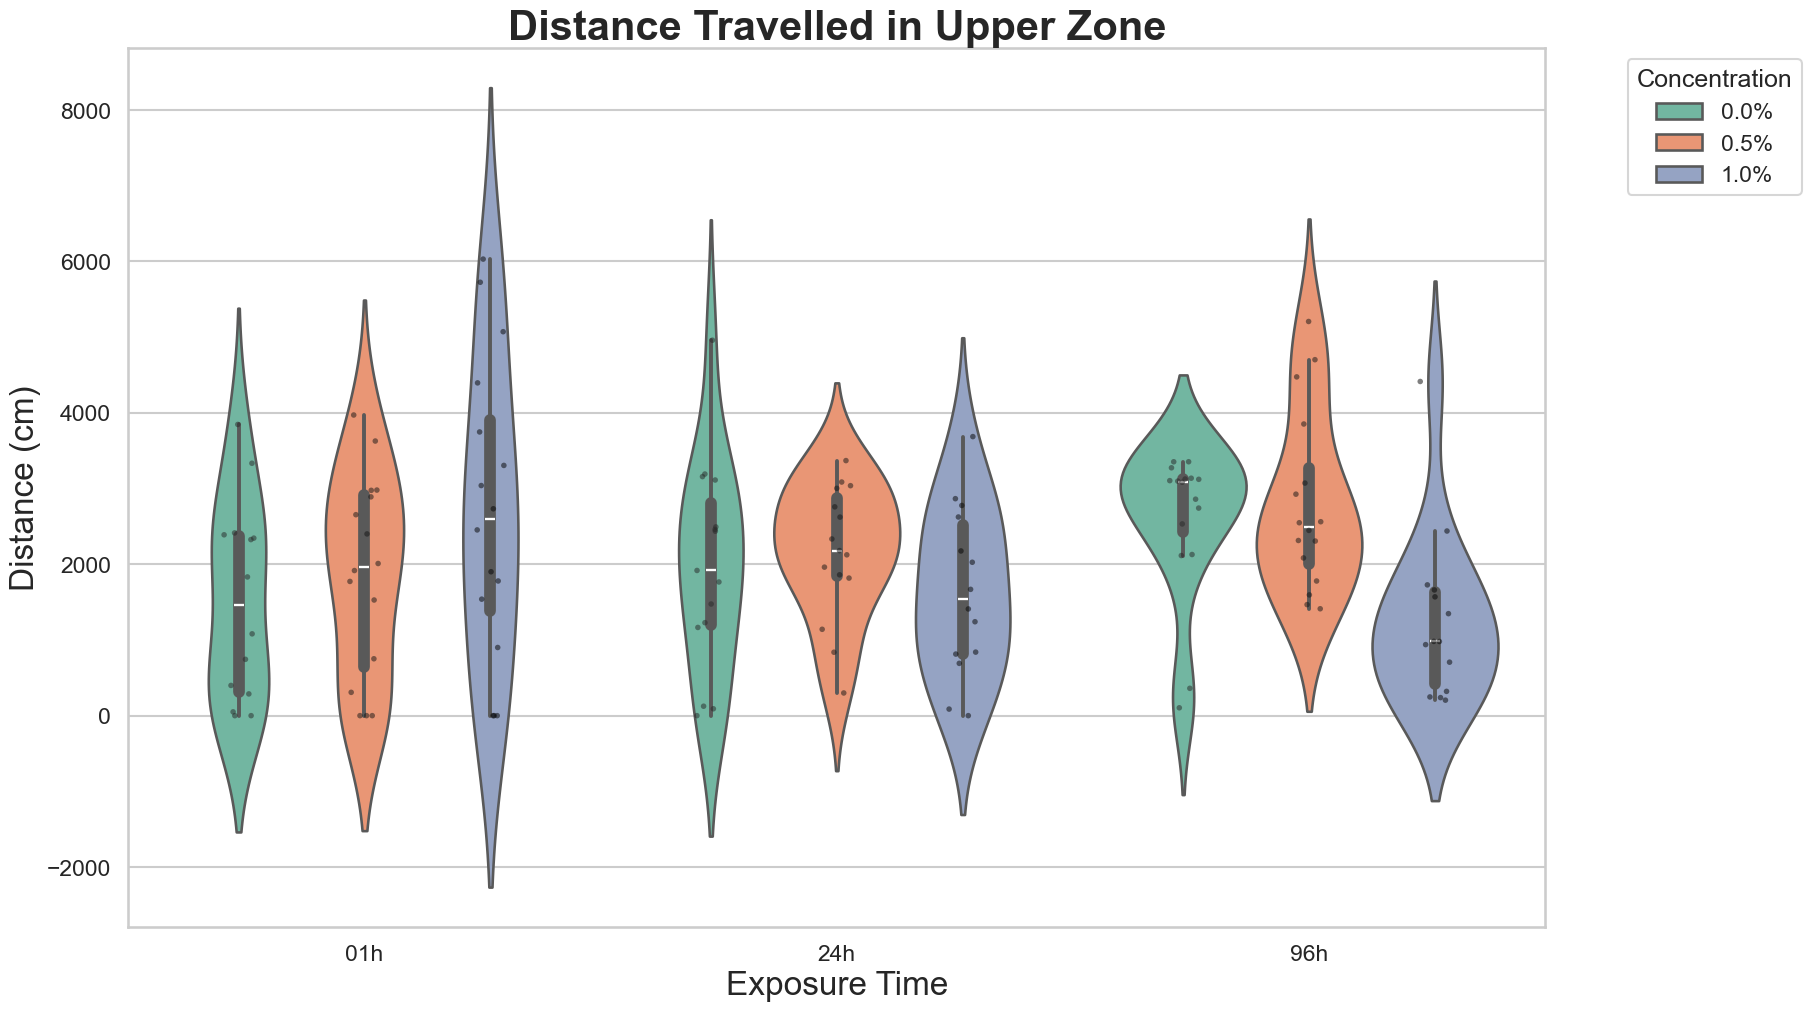

In [42]:
# Visualizing Distance Travelled in the Upper Zone of the Tank
plt.figure(figsize=(18,10), constrained_layout=True)

sns.violinplot(
    data=ntt,
    x='time',
    y='dist_upper',
    hue='conc',
    split=False,
    inner='box',
    palette='Set2'
)

# Overlay jittered raw points
sns.stripplot(
    data=ntt,
    x='time',
    y='dist_upper',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    size=4,
    alpha=0.5,
    legend=False
)

plt.ylabel("Distance (cm)", size=24)
plt.xlabel("Exposure Time", size=24)
plt.title("Distance Travelled in Upper Zone", fontsize=30, weight='bold')
plt.legend(title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
# Summary statistics for distance travelled in upper zone by group
kruskal_summary(ntt, value_col='dist_upper', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
                 mean          std   median  min     max  count
group                                                          
01h 0.0%  1503.314286  1301.769698  1456.45  0.0  3846.3     14
01h 0.5%  1861.531250  1322.191998  1963.10  0.0  3971.0     16
01h 1.0%  2663.601875  1971.458077  2592.90  0.0  6030.3     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 2.670, p = 0.2632
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
                 mean          std    median     min      max  count
group                                                               
24h 0.0%  1971.735333  1367.371438  1917.770    0.00  4958.76     15
24h 0.5%  2162.076000   882.283670  2180.270  299.61  3369.00     15
24h 1.0%  1635.867143  1106.750534  1538.925    0.00  3685.84     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 1.748, p = 0.4173
No significant differences; skipping pairwise tests.

=== Time: 96h Summary ===
      

#### Total Distance

In [44]:
# Summary Table for Total Distance Travelled in the Tank
ntt.groupby('group')['dist_total'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,3773.71,2328.10,4258.30,253.70,8176.00,14
01h 0.5%,4061.38,2152.81,4972.75,0.00,6117.90,16
01h 1.0%,6357.43,2904.98,6668.30,0.00,11405.40,16
24h 0.0%,5188.12,2167.15,5016.52,1207.55,10820.03,15
24h 0.5%,5159.77,1238.34,5086.58,3307.47,7710.11,15
24h 1.0%,4625.03,1165.21,4422.98,2761.66,6566.12,14
96h 0.0%,5215.12,1811.22,5390.47,622.36,8323.07,16
96h 0.5%,5091.77,1084.42,5005.10,2849.66,7062.33,16
96h 1.0%,4138.75,1026.96,3911.70,2637.07,6604.87,14


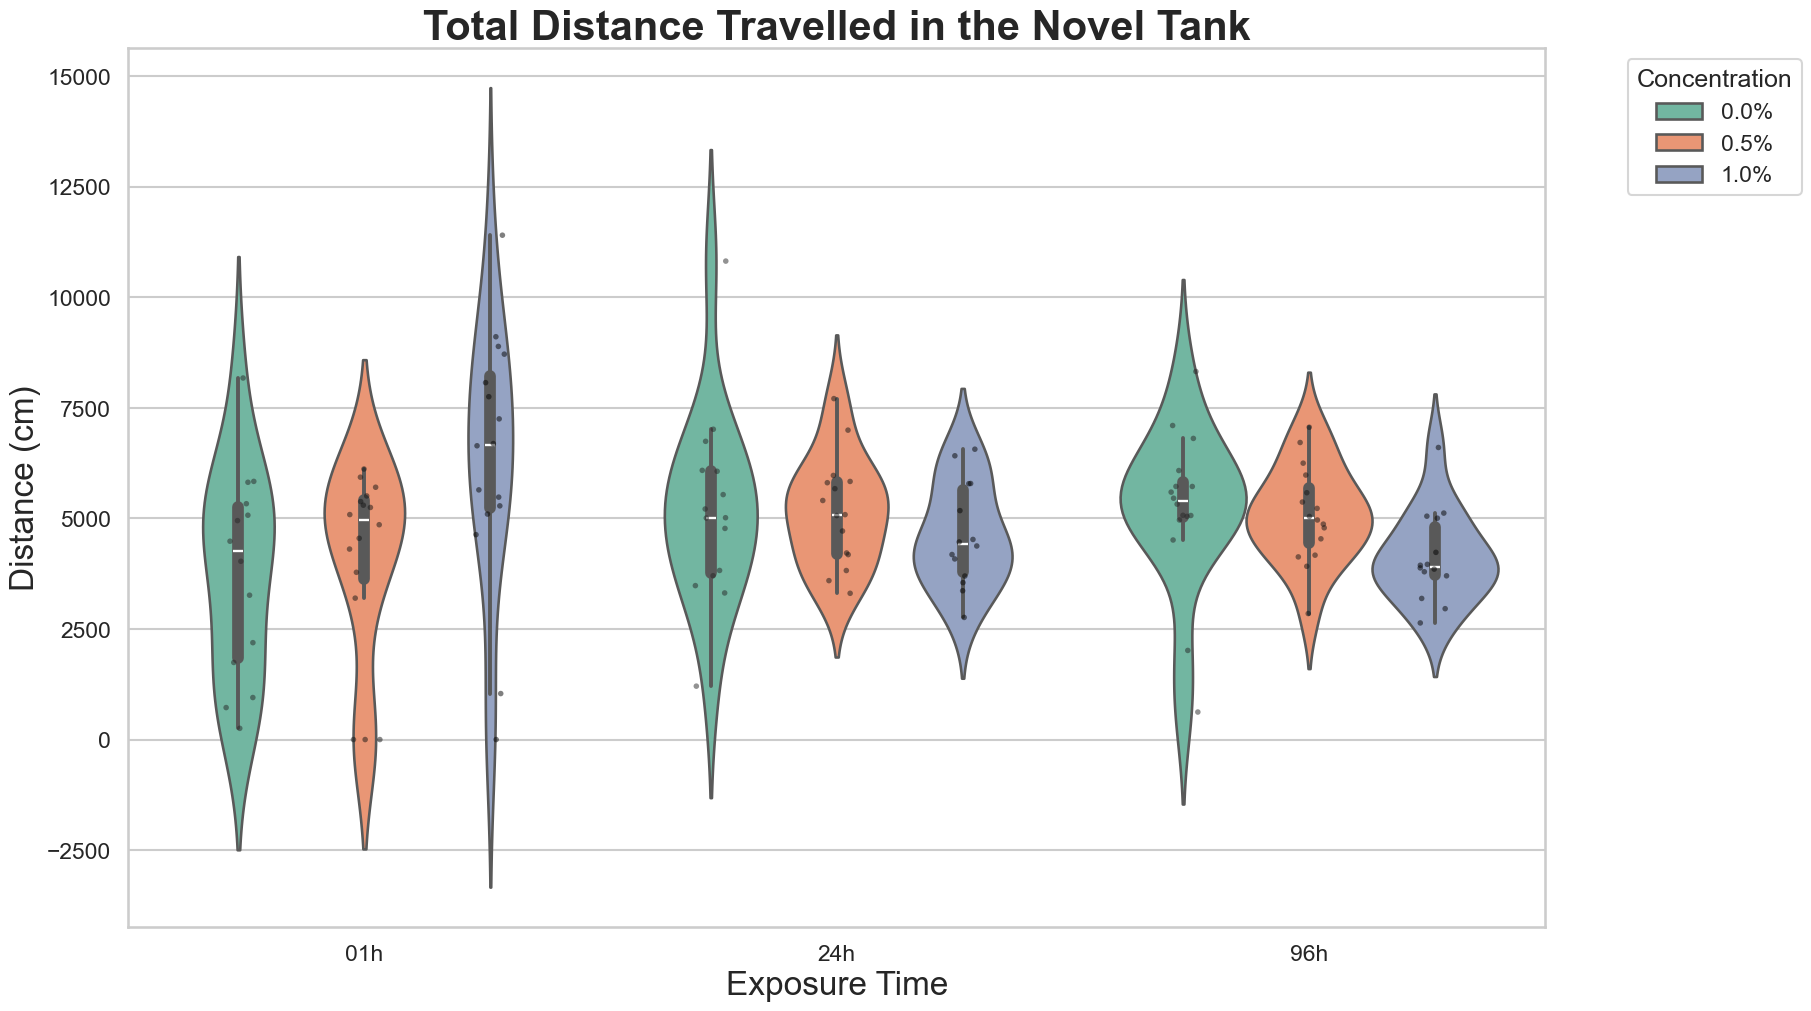

In [45]:
# Visualizing Total Distance Travelled in the Novel Tank
plt.figure(figsize=(18,10), constrained_layout=True)

sns.violinplot(
    data=ntt,
    x='time',
    y='dist_total',
    hue='conc',
    split=False,
    inner='box',
    palette='Set2'
)

# Overlay jittered raw points
sns.stripplot(
    data=ntt,
    x='time',
    y='dist_total',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    size=4,
    alpha=0.5,
    legend=False
)

plt.ylabel("Distance (cm)", size=24)
plt.xlabel("Exposure Time", size=24)
plt.title("Total Distance Travelled in the Novel Tank", fontsize=30, weight='bold')
plt.legend(title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
# Summary statistics for total distance travelled by group
kruskal_summary(ntt, value_col='dist_total', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
                 mean          std   median    min      max  count
group                                                             
01h 0.0%  3773.707143  2328.101978  4258.30  253.7   8176.0     14
01h 0.5%  4061.381250  2152.806360  4972.75    0.0   6117.9     16
01h 1.0%  6357.427500  2904.978404  6668.30    0.0  11405.4     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 9.571, p = 0.0084
Significant differences found; running pairwise tests...
01h 01h 0.0% vs 01h 0.5% p = 1.0000
01h 01h 0.0% vs 01h 1.0% p = 0.0317
01h 01h 0.5% vs 01h 1.0% p = 0.0222

=== Time: 24h Summary ===
                 mean          std   median      min       max  count
group                                                                
24h 0.0%  5188.115333  2167.146854  5016.52  1207.55  10820.03     15
24h 0.5%  5159.771333  1238.343786  5086.58  3307.47   7710.11     15
24h 1.0%  4625.032143  1165.213150  4422.98  2761.66   6566.12     14

=== Time: 24h Kruskal-Wa

Attention to **borderline significance** in *96h 0.5%* vs *96h 1.0%* (p = 0.0505)

### Velocity

#### Mean Velocity on the Bottom Portion

In [47]:
# Summary Table for Velocity in the Bottom Zone of the Tank
ntt.groupby('group')['vel_bottom'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,10.22,3.60,10.44,3.63,17.05,14
01h 0.5%,9.54,5.00,10.98,0.00,16.39,16
01h 1.0%,15.74,6.87,15.36,0.00,32.60,16
24h 0.0%,11.85,4.16,10.56,7.34,23.54,15
24h 0.5%,11.64,3.08,11.43,7.15,19.12,15
24h 1.0%,11.93,2.46,12.13,7.85,15.41,14
96h 0.0%,12.84,3.40,12.00,6.37,21.04,16
96h 0.5%,12.11,3.58,11.96,5.29,21.91,16
96h 1.0%,10.69,3.15,10.09,5.37,18.73,14


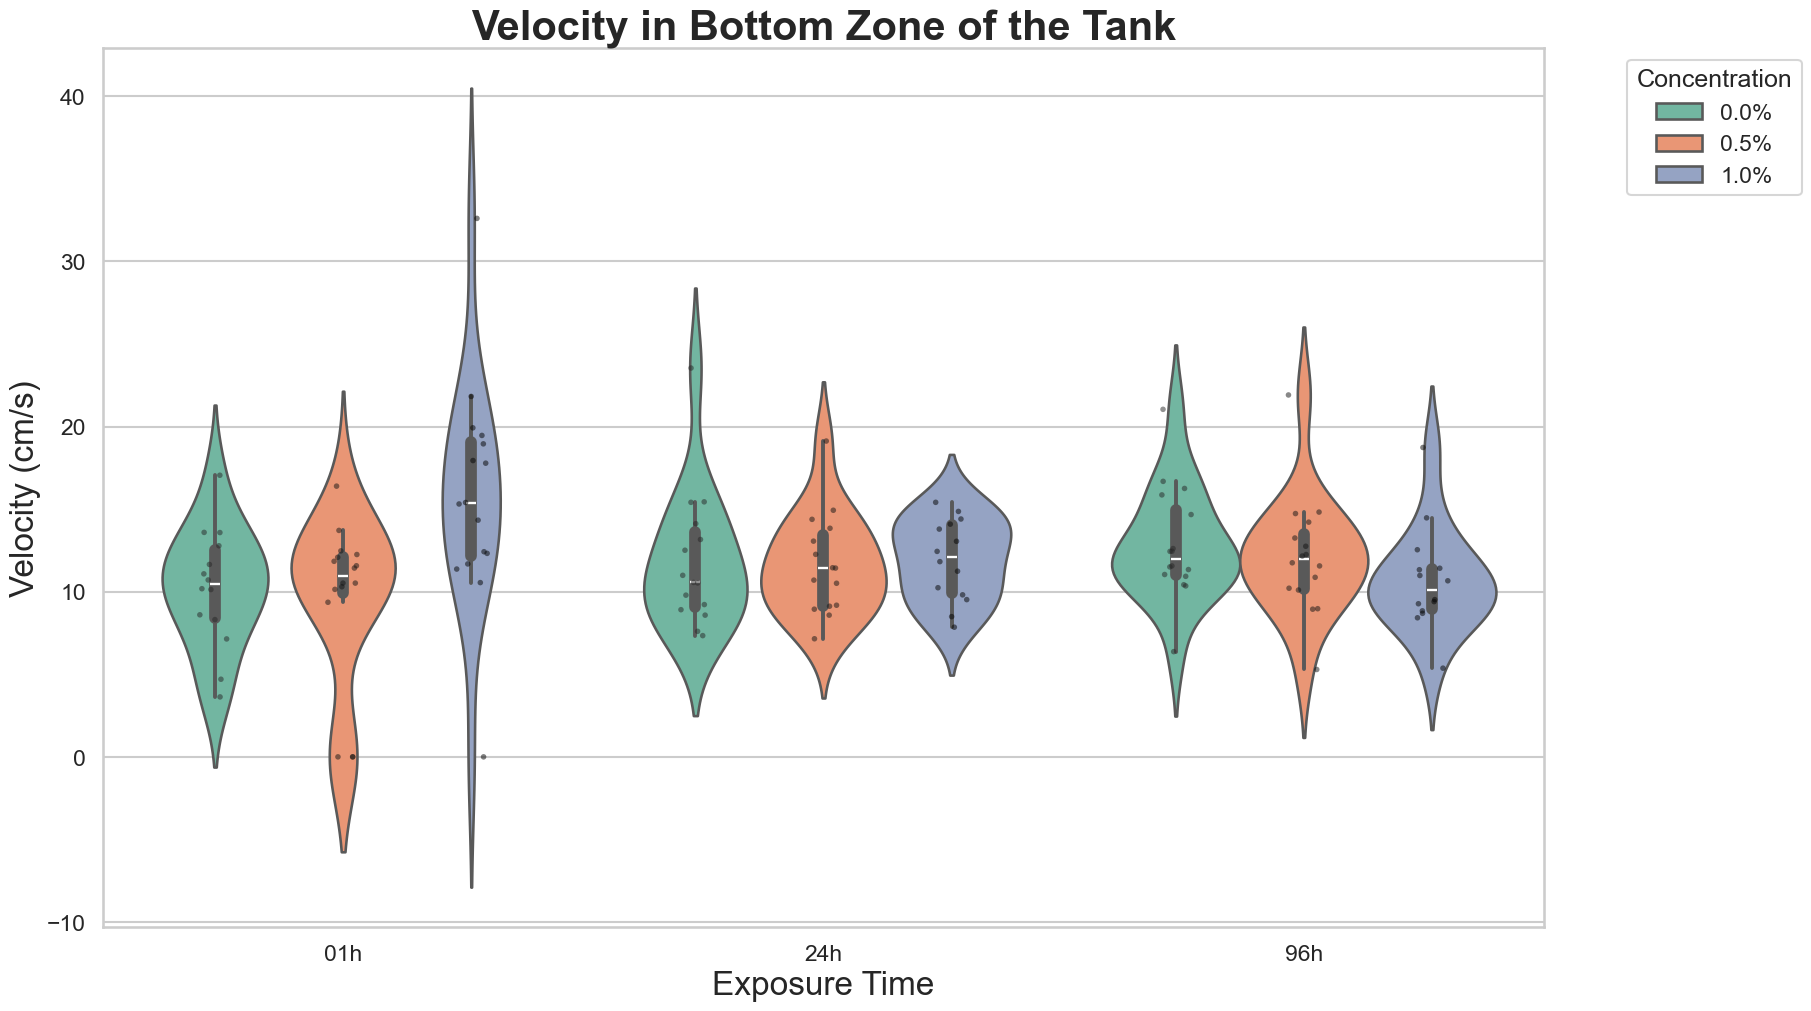

In [48]:
# Visualizing Velocity in the Bottom Zone of the Tank
plt.figure(figsize=(18,10), constrained_layout=True)

sns.violinplot(
    data=ntt,
    x='time',
    y='vel_bottom',
    hue='conc',
    inner='box',
    palette='Set2'
    )

sns.stripplot(
    data=ntt,
    x='time',
    y='vel_bottom',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    size=4,
    alpha=0.5,
    legend=False
    )

plt.ylabel("Velocity (cm/s)", size=24)
plt.xlabel("Exposure Time", size=24)
plt.title("Velocity in Bottom Zone of the Tank", fontsize=30, weight='bold')
plt.legend(title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [49]:
# Summary statistics for velocity in bottom zone by group
kruskal_summary(ntt, value_col='vel_bottom', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
               mean       std  median   min    max  count
group                                                    
01h 0.0%  10.223571  3.600647  10.445  3.63  17.05     14
01h 0.5%   9.536250  5.004001  10.975  0.00  16.39     16
01h 1.0%  15.740625  6.865926  15.355  0.00  32.60     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 12.550, p = 0.0019
Significant differences found; running pairwise tests...
01h 01h 0.0% vs 01h 0.5% p = 1.0000
01h 01h 0.0% vs 01h 1.0% p = 0.0101
01h 01h 0.5% vs 01h 1.0% p = 0.0059

=== Time: 24h Summary ===
               mean       std  median   min    max  count
group                                                    
24h 0.0%  11.846667  4.162485   10.56  7.34  23.54     15
24h 0.5%  11.643333  3.081965   11.43  7.15  19.12     15
24h 1.0%  11.929286  2.458309   12.13  7.85  15.41     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 0.326, p = 0.8498
No significant differences; skipping pairwise tests.

=== 

#### Mean Velocity on the Upper Portion

In [50]:
# Summary Table for Velocity in the Upper Zone of the Tank
ntt.groupby('group')['vel_upper'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,11.71,4.03,11.33,4.75,22.11,12
01h 0.5%,12.61,1.59,12.21,10.30,15.05,13
01h 1.0%,18.54,3.97,18.83,12.18,25.64,13
24h 0.0%,17.01,7.68,14.78,6.95,32.41,14
24h 0.5%,12.79,2.73,12.86,8.61,17.46,15
24h 1.0%,18.10,6.65,16.07,9.81,33.89,13
96h 0.0%,15.57,3.96,14.52,10.61,26.31,16
96h 0.5%,12.63,2.33,12.72,7.33,17.13,16
96h 1.0%,19.71,14.21,15.80,7.20,64.15,14


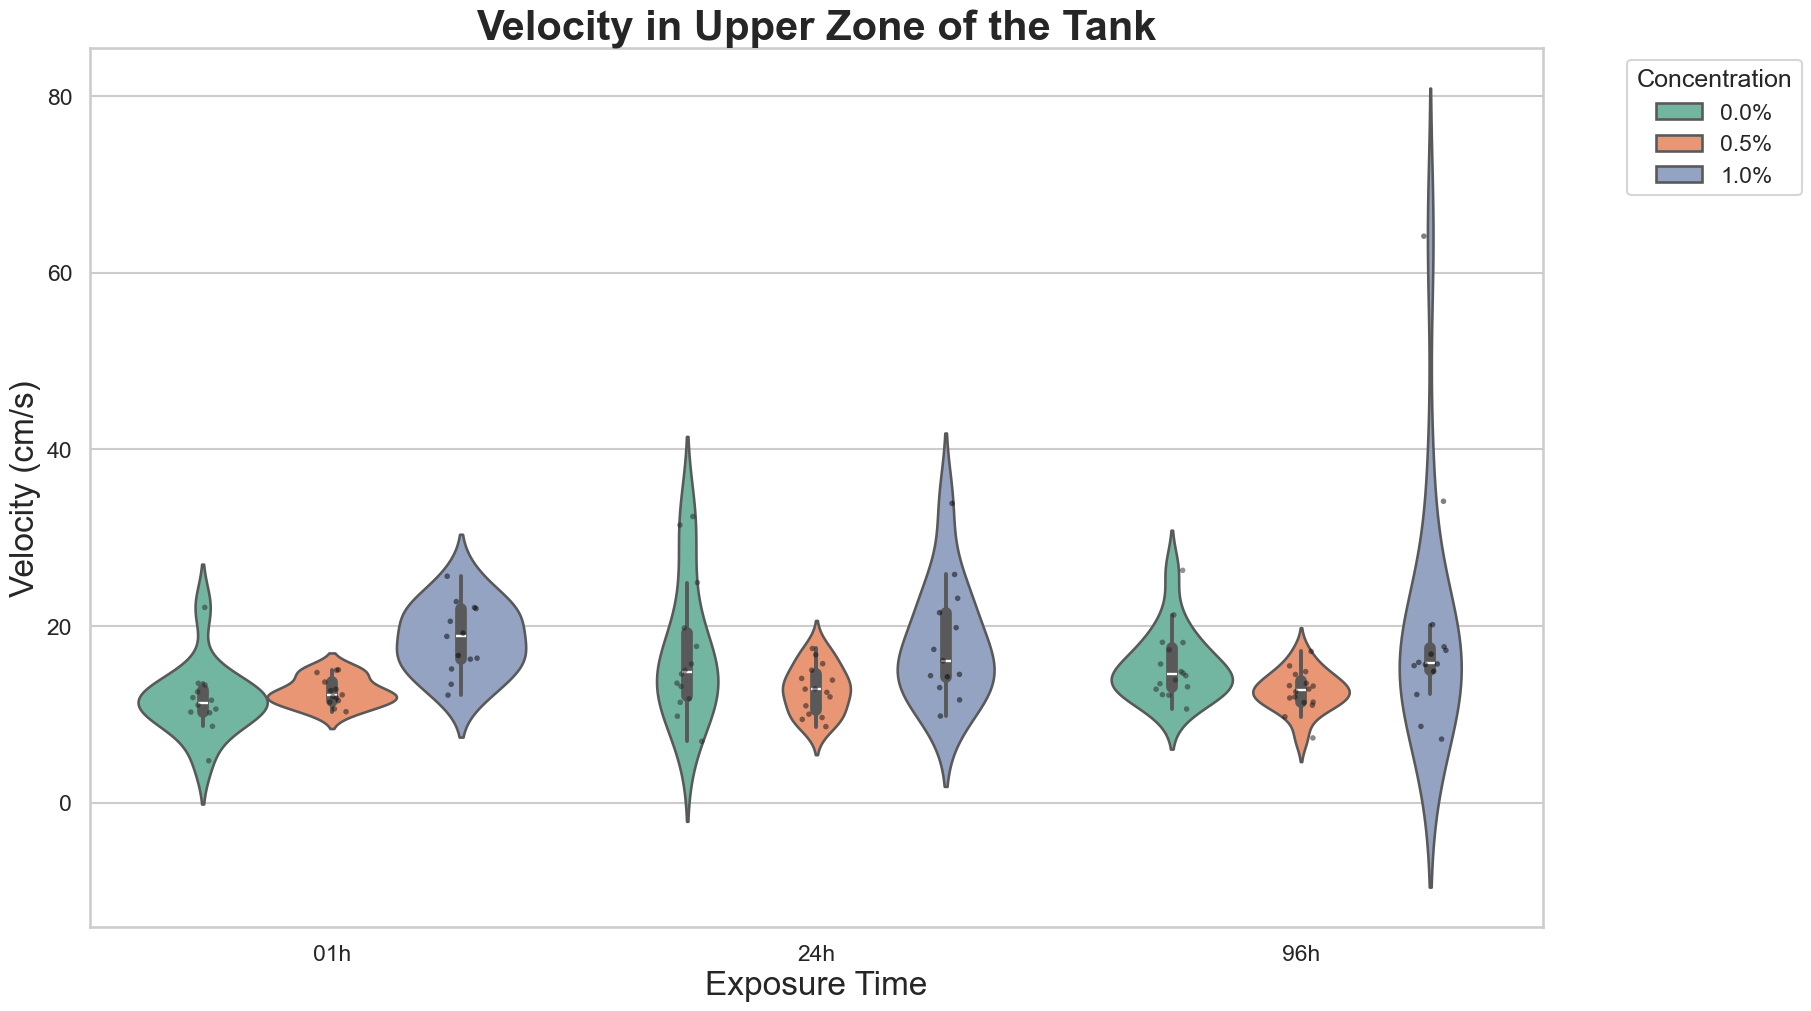

In [51]:
# Visualizing Velocity in the Upper Zone of the Tank
plt.figure(figsize=(18,10), constrained_layout=True)

sns.violinplot(
    data=ntt,
    x='time',
    y='vel_upper',
    hue='conc',
    inner='box',
    palette='Set2'
    )

sns.stripplot(
    data=ntt,
    x='time',
    y='vel_upper',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    size=4,
    alpha=0.5,
    legend=False
    )

plt.ylabel("Velocity (cm/s)", size=24)
plt.xlabel("Exposure Time", size=24)
plt.title("Velocity in Upper Zone of the Tank", fontsize=30, weight='bold')
plt.legend(title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [52]:
# Summary statistics for velocity in upper zone by group
kruskal_summary(ntt, value_col='vel_upper', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
               mean       std  median    min    max  count
group                                                     
01h 0.0%  11.709167  4.030762   11.33   4.75  22.11     12
01h 0.5%  12.608462  1.591068   12.21  10.30  15.05     13
01h 1.0%  18.543846  3.970196   18.83  12.18  25.64     13

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = nan, p = nan
No significant differences; skipping pairwise tests.

=== Time: 24h Summary ===
               mean       std  median   min    max  count
group                                                    
24h 0.0%  17.006429  7.683599  14.775  6.95  32.41     14
24h 0.5%  12.786667  2.729840  12.860  8.61  17.46     15
24h 1.0%  18.099231  6.654861  16.070  9.81  33.89     13

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = nan, p = nan
No significant differences; skipping pairwise tests.

=== Time: 96h Summary ===
               mean        std  median    min    max  count
group                               

#### Mean Velocity Overall

In [53]:
ntt.groupby('group')['vel_mean'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,10.60,3.84,10.78,4.19,19.58,14
01h 0.5%,9.89,5.04,11.78,0.00,14.62,16
01h 1.0%,16.10,6.13,17.47,0.00,27.29,16
24h 0.0%,14.17,5.39,13.02,7.15,27.97,15
24h 0.5%,12.21,2.73,12.14,8.29,18.29,15
24h 1.0%,14.65,4.21,13.62,7.85,23.47,14
96h 0.0%,14.20,3.32,13.30,10.48,23.68,16
96h 0.5%,12.37,2.44,12.46,6.31,15.93,16
96h 1.0%,15.20,7.84,13.76,6.29,39.31,14


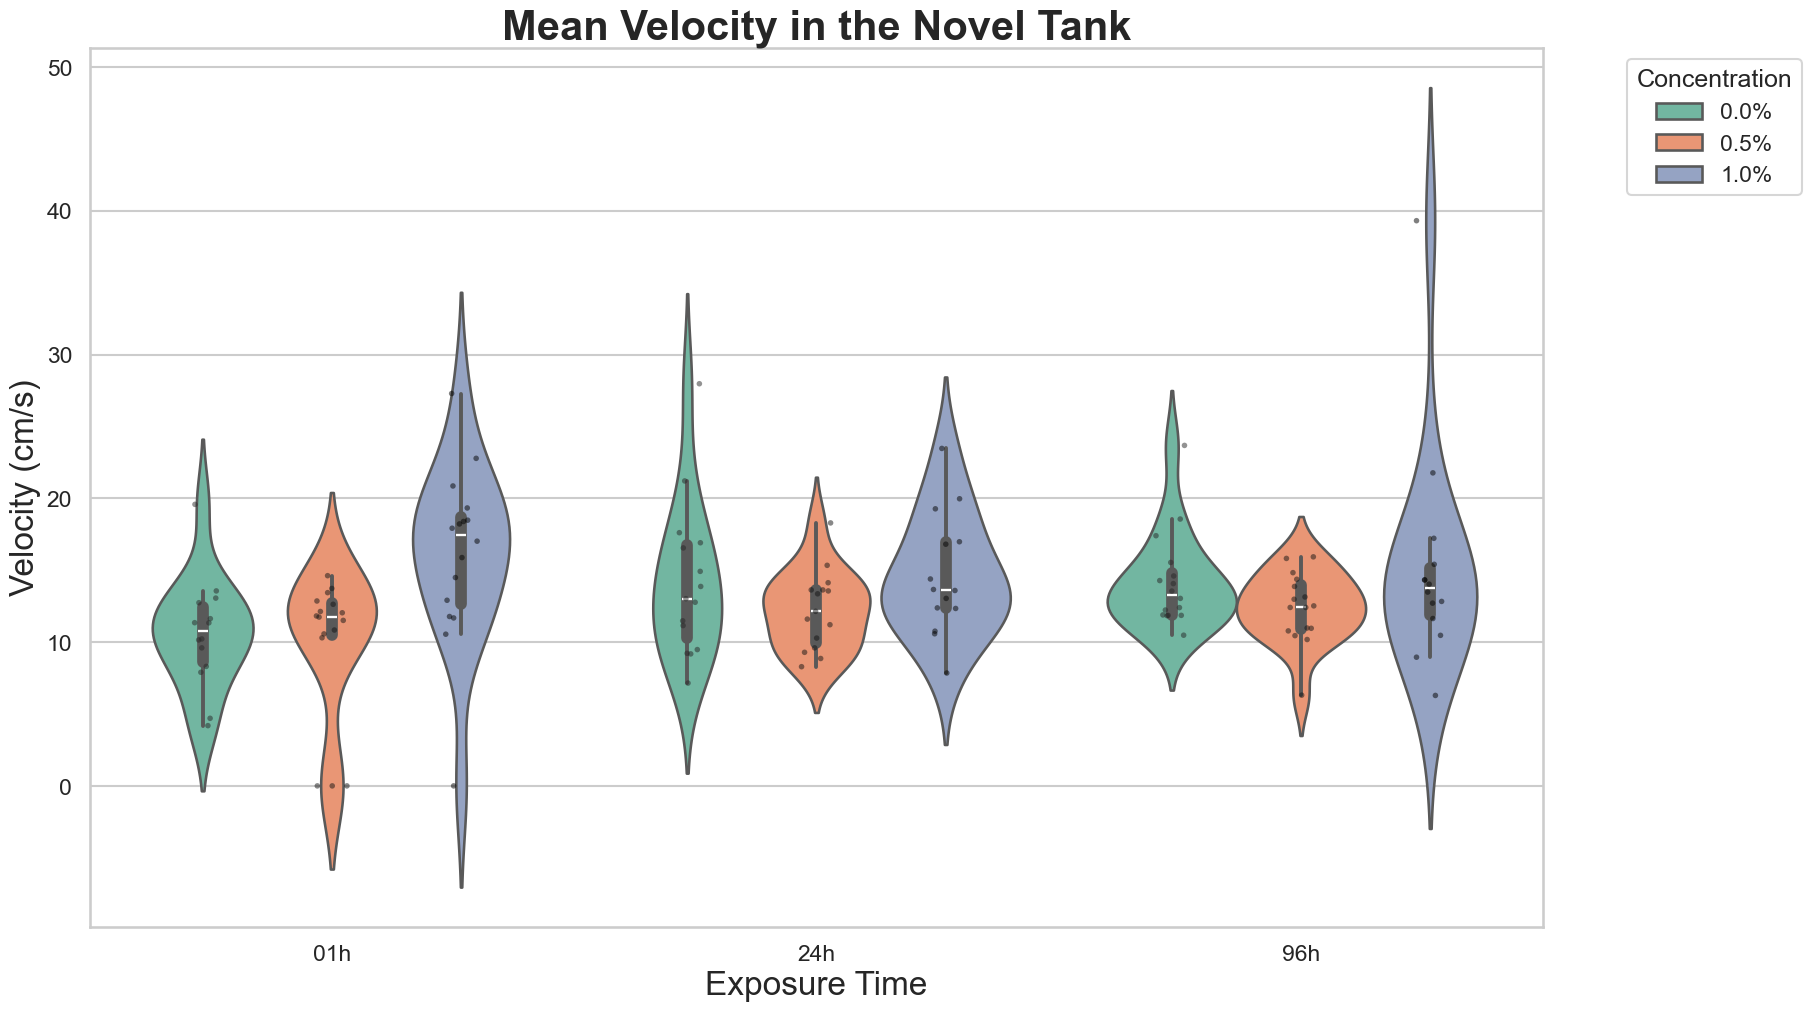

In [54]:
# Visualizing Mean Velocity in the Novel Tank
plt.figure(figsize=(18,10), constrained_layout=True)

sns.violinplot(
    data=ntt,
    x='time',
    y='vel_mean',
    hue='conc',
    inner='box',
    palette='Set2'
    )

sns.stripplot(
    data=ntt,
    x='time',
    y='vel_mean',
    hue='conc',
    dodge=True,
    jitter=True,
    color='black',
    size=4,
    alpha=0.5,
    legend=False
    )

plt.ylabel("Velocity (cm/s)", size=24)
plt.xlabel("Exposure Time", size=24)
plt.title("Mean Velocity in the Novel Tank", fontsize=30, weight='bold')
plt.legend(title="Concentration", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [56]:
# Summary statistics for mean velocity by group
kruskal_summary(ntt, value_col='vel_mean', time_col='time', group_col='group', alpha=0.05)


=== Time: 01h Summary ===
               mean       std  median   min    max  count
group                                                    
01h 0.0%  10.595000  3.842905   10.78  4.19  19.58     14
01h 0.5%   9.889375  5.036074   11.78  0.00  14.62     16
01h 1.0%  16.098750  6.129266   17.47  0.00  27.29     16

=== Time: 01h Kruskal-Wallis ===
Kruskal-Wallis H = 12.615, p = 0.0018
Significant differences found; running pairwise tests...
01h 01h 0.0% vs 01h 0.5% p = 1.0000
01h 01h 0.0% vs 01h 1.0% p = 0.0089
01h 01h 0.5% vs 01h 1.0% p = 0.0076

=== Time: 24h Summary ===
               mean       std  median   min    max  count
group                                                    
24h 0.0%  14.166000  5.385016  13.020  7.15  27.97     15
24h 0.5%  12.214000  2.734130  12.140  8.29  18.29     15
24h 1.0%  14.649286  4.212829  13.625  7.85  23.47     14

=== Time: 24h Kruskal-Wallis ===
Kruskal-Wallis H = 2.301, p = 0.3165
No significant differences; skipping pairwise tests.

=== 

---

<div style="text-align: center;">
    <h2>The Endurance Test</h2>
</div>

<div style="text-align: center;">
    <img src="images/endurance.jpg" width="1400" alt="Endurance Image">
</div>

### Attempts

### Endurance Index

---

<div style="text-align: center;">
    <h2>Biometric and Physiologic</h2>
</div>

![](images/bio.jpg)